In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
df = pd.read_csv('/Users/kanikag/anaconda3/lib/python3.11/site-packages/pandas/io/parsers/train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
# Check the dimensions
df.shape

(1460, 81)

In [4]:
null = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null_df = null[null["Null %"] > 0]
null_df

Null %
Features            
PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
MasVnrType     59.73
FireplaceQu    47.26
LotFrontage    17.74
GarageYrBlt     5.55
GarageCond      5.55
GarageType      5.55
GarageFinish    5.55
GarageQual      5.55
BsmtFinType2    2.60
BsmtExposure    2.60
BsmtQual        2.53
BsmtCond        2.53
BsmtFinType1    2.53
MasVnrArea      0.55
Electrical      0.07

In [5]:
# we will drop the Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature' column becuase there are so many missing values and id column is not required
df = df.drop(['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'],axis=1)

In [6]:
# Check the dimensions after dropping columns
df.shape

(1460, 75)

In [7]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 75 columns]

In [8]:
# Get the sum of null values for each column
null_values_sum = df.isnull().sum()

# Sort in descending order
#null_values_sum_sorted = null_values_sum.sort_values(ascending=False)
#print(null_values_sum_sorted)

columns_with_null = null_values_sum[null_values_sum > 0]

# Get the count of columns with null values
num_columns_with_null = len(columns_with_null)
print(num_columns_with_null)

13


In [9]:
# Sort in descending order
null_values_sum_sorted = null_values_sum.sort_values(ascending=False)
print(null_values_sum_sorted)

LotFrontage     259
GarageYrBlt      81
GarageCond       81
GarageType       81
GarageFinish     81
               ... 
BsmtUnfSF         0
TotalBsmtSF       0
MSSubClass        0
HeatingQC         0
SalePrice         0
Length: 75, dtype: int64


In [10]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 75 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [12]:
#changing the column types
#Columns MSSubClass, OverallQual, OverallCond need to be converted to object type
#Column LotFrontage and MasVnrArea needs to be converted to numeric type.
## Convert three columns to 'object' type as mentioned above
df[['MSSubClass', 'OverallQual', 'OverallCond']] = df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')
## Convert two columns to 'numeric' type as mentioned above
df['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors='coerce')
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')
## Check whether the data types of five columns have changed
df[['MSSubClass', 'OverallQual', 'OverallCond', 'LotFrontage', 'MasVnrArea']].dtypes

MSSubClass      object
OverallQual     object
OverallCond     object
LotFrontage    float64
MasVnrArea     float64
dtype: object

In [13]:
df.describe()

Id  LotFrontage        LotArea    YearBuilt  YearRemodAdd  \
count  1460.000000  1201.000000    1460.000000  1460.000000   1460.000000   
mean    730.500000    70.049958   10516.828082  1971.267808   1984.865753   
std     421.610009    24.284752    9981.264932    30.202904     20.645407   
min       1.000000    21.000000    1300.000000  1872.000000   1950.000000   
25%     365.750000    59.000000    7553.500000  1954.000000   1967.000000   
50%     730.500000    69.000000    9478.500000  1973.000000   1994.000000   
75%    1095.250000    80.000000   11601.500000  2000.000000   2004.000000   
max    1460.000000   313.000000  215245.000000  2010.000000   2010.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  ...  \
count  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    103.685262   443.639726    46.549315   567.240411  1057.429452  ...   
std     181.066207   456.098091   161.319273   441.866955   438.705324  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000   223.000000   795.750000  ...   
50%       0.000000   383.500000     0.000000   477.500000   991.500000  ...   
75%     166.000000   712.250000     0.000000   808.000000  1298.250000  ...   
max    1600.000000  5644.000000  1474.000000  2336.000000  6110.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 35 columns]

In [14]:
# for the LotFrontage column we will impute the missing values with the median since the feature contains outliers
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

In [15]:
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

# Get the sum of null values for each column
null_values_sum = df.isnull().sum()

# Sort in descending order
#null_values_sum_sorted = null_values_sum.sort_values(ascending=False)
#print(null_values_sum_sorted)

columns_with_null = null_values_sum[null_values_sum > 0]

# Get the count of columns with null values
num_columns_with_null = len(columns_with_null)
print(num_columns_with_null)

0


In [16]:
df.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1         60       RL         65.0     8450   Pave      Reg         Lvl   
1   2         20       RL         80.0     9600   Pave      Reg         Lvl   
2   3         60       RL         68.0    11250   Pave      IR1         Lvl   
3   4         70       RL         60.0     9550   Pave      IR1         Lvl   
4   5         60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold YrSold SaleType  SaleCondition  SalePrice  
0       0      2   2008       WD         Normal     208500  
1       0      5   2007       WD         Normal     181500  
2       0      9   2008       WD         Normal     223500  
3       0      2   2006       WD        Abnorml     140000  
4       0     12   2008       WD         Normal     250000  

[5 rows x 75 columns]

## UNIVARIATE ANALYSIS

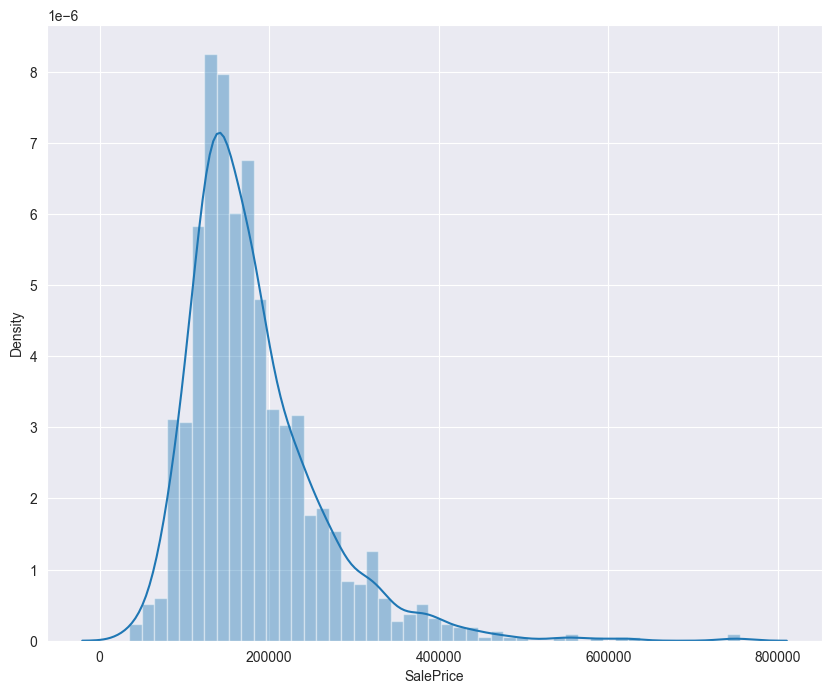

In [17]:
#target variable 'SalePrice'
plt.figure(figsize=[10,8])
sns.set_style('darkgrid')
sns.distplot(df['SalePrice']);

In [18]:
## Extract numerical columns
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.head()

Id  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450       2003          2003       196.0         706   
1   2         80.0     9600       1976          1976         0.0         978   
2   3         68.0    11250       2001          2002       162.0         486   
3   4         60.0     9550       1915          1970         0.0         216   
4   5         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  WoodDeckSF  OpenPorchSF  \
0           0        150          856  ...           0           61   
1           0        284         1262  ...         298            0   
2           0        434          920  ...           0           42   
3           0        540          756  ...           0           35   
4           0        490         1145  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 35 columns]

In [19]:
df.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1         60       RL         65.0     8450   Pave      Reg         Lvl   
1   2         20       RL         80.0     9600   Pave      Reg         Lvl   
2   3         60       RL         68.0    11250   Pave      IR1         Lvl   
3   4         70       RL         60.0     9550   Pave      IR1         Lvl   
4   5         60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold YrSold SaleType  SaleCondition  SalePrice  
0       0      2   2008       WD         Normal     208500  
1       0      5   2007       WD         Normal     181500  
2       0      9   2008       WD         Normal     223500  
3       0      2   2006       WD        Abnorml     140000  
4       0     12   2008       WD         Normal     250000  

[5 rows x 75 columns]

In [20]:
## Extract categorical columns
df_cat = df.select_dtypes(include='object')
df_cat.head()

MSSubClass MSZoning Street LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1  ... Electrical KitchenQual Functional  \
0       Gtl      CollgCr       Norm  ...      SBrkr          Gd        Typ   
1       Gtl      Veenker      Feedr  ...      SBrkr          TA        Typ   
2       Gtl      CollgCr       Norm  ...      SBrkr          Gd        Typ   
3       Gtl      Crawfor       Norm  ...      SBrkr          Gd        Typ   
4       Gtl      NoRidge       Norm  ...      SBrkr          Gd        Typ   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          RFn         TA         TA          Y       WD   
1     Attchd          RFn         TA         TA          Y       WD   
2     Attchd          RFn         TA         TA          Y       WD   
3     Detchd          Unf         TA         TA          Y       WD   
4     Attchd          RFn         TA         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 40 columns]

In [21]:
df.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1         60       RL         65.0     8450   Pave      Reg         Lvl   
1   2         20       RL         80.0     9600   Pave      Reg         Lvl   
2   3         60       RL         68.0    11250   Pave      IR1         Lvl   
3   4         70       RL         60.0     9550   Pave      IR1         Lvl   
4   5         60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold YrSold SaleType  SaleCondition  SalePrice  
0       0      2   2008       WD         Normal     208500  
1       0      5   2007       WD         Normal     181500  
2       0      9   2008       WD         Normal     223500  
3       0      2   2006       WD        Abnorml     140000  
4       0     12   2008       WD         Normal     250000  

[5 rows x 75 columns]

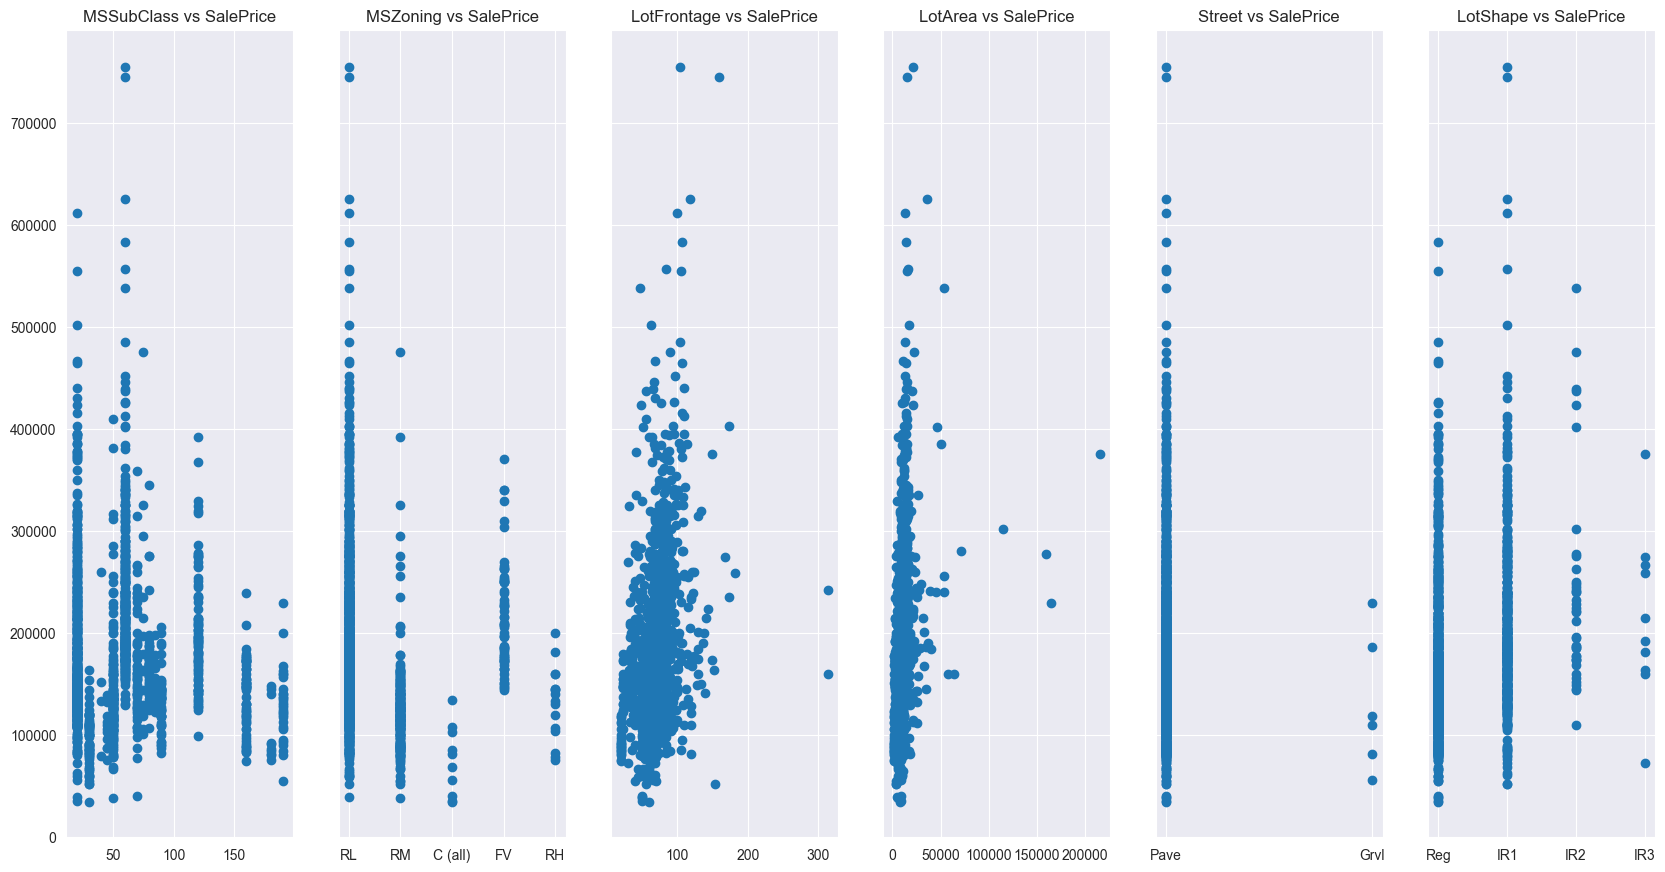

In [22]:
fig, ax = plt.subplots(ncols=6, sharey=True)

MSSubClass = ax[0].scatter(df['MSSubClass'], df['SalePrice'])
MSSubClass.set_label("MSSubClass")
ax[0].set_title('MSSubClass vs SalePrice')

MSZoning= ax[1].scatter(df['MSZoning'], df['SalePrice'])
MSZoning.set_label("MSZoning")
ax[1].set_title('MSZoning vs SalePrice')

LotFrontage = ax[2].scatter(df['LotFrontage'], df['SalePrice'])
LotFrontage.set_label("LotFrontage")
ax[2].set_title('LotFrontage vs SalePrice')

LotArea = ax[3].scatter(df['LotArea'], df['SalePrice'])
LotArea.set_label("LotArea")
ax[3].set_title('LotArea vs SalePrice')

Street = ax[4].scatter(df['Street'], df['SalePrice'])
Street.set_label("Street")
ax[4].set_title('Street vs SalePrice')

LotShape = ax[5].scatter(df['LotShape'], df['SalePrice'])
LotShape.set_label("LotShape")
ax[5].set_title('LotShape vs SalePrice')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

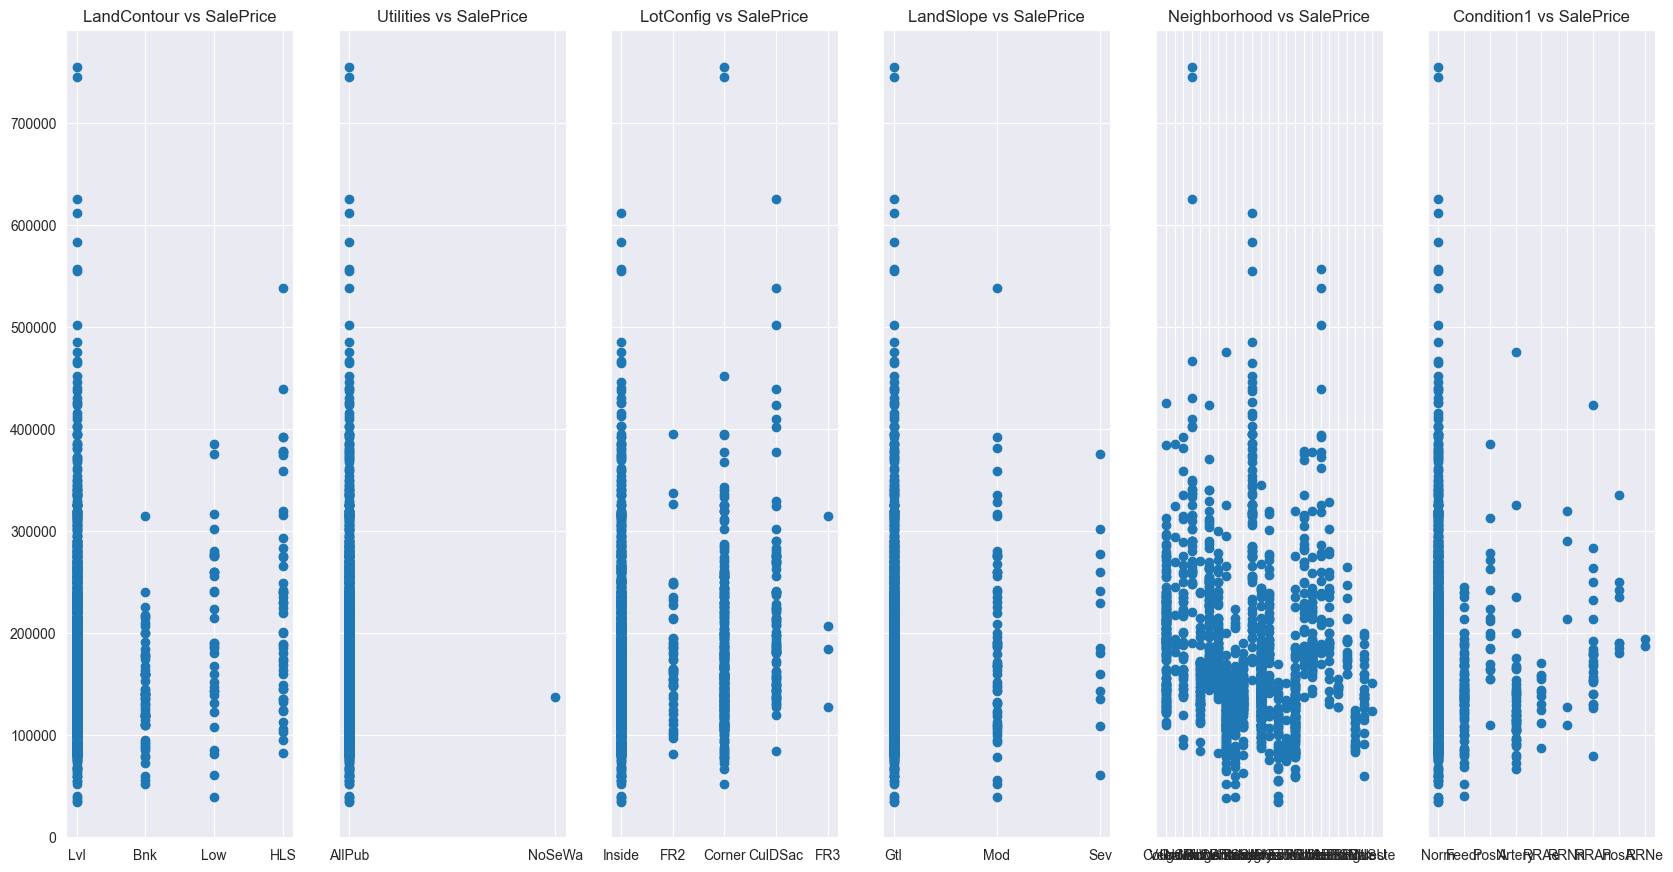

In [23]:
fig, ax = plt.subplots(ncols=6, sharey=True)
LandContour = ax[0].scatter(df['LandContour'], df['SalePrice'])
LandContour.set_label("LandContour")
ax[0].set_title('LandContour vs SalePrice')

Utilities= ax[1].scatter(df['Utilities'], df['SalePrice'])
Utilities.set_label("Utilities")
ax[1].set_title('Utilities vs SalePrice')

LotConfig = ax[2].scatter(df['LotConfig'], df['SalePrice'])
LotConfig.set_label("LotConfig")
ax[2].set_title('LotConfig vs SalePrice')

LandSlope = ax[3].scatter(df['LandSlope'], df['SalePrice'])
LandSlope.set_label("LandSlope")
ax[3].set_title('LandSlope vs SalePrice')

Neighborhood = ax[4].scatter(df['Neighborhood'], df['SalePrice'])
Neighborhood.set_label("Neighborhood")
ax[4].set_title('Neighborhood vs SalePrice')

Condition1 = ax[5].scatter(df['Condition1'], df['SalePrice'])
Condition1.set_label("Condition1")
ax[5].set_title('Condition1 vs SalePrice')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

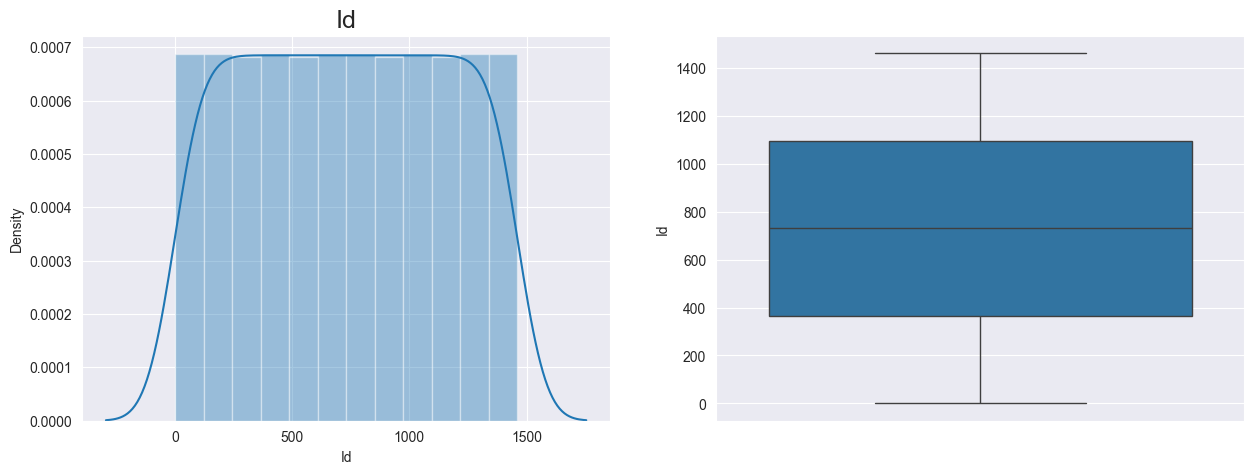

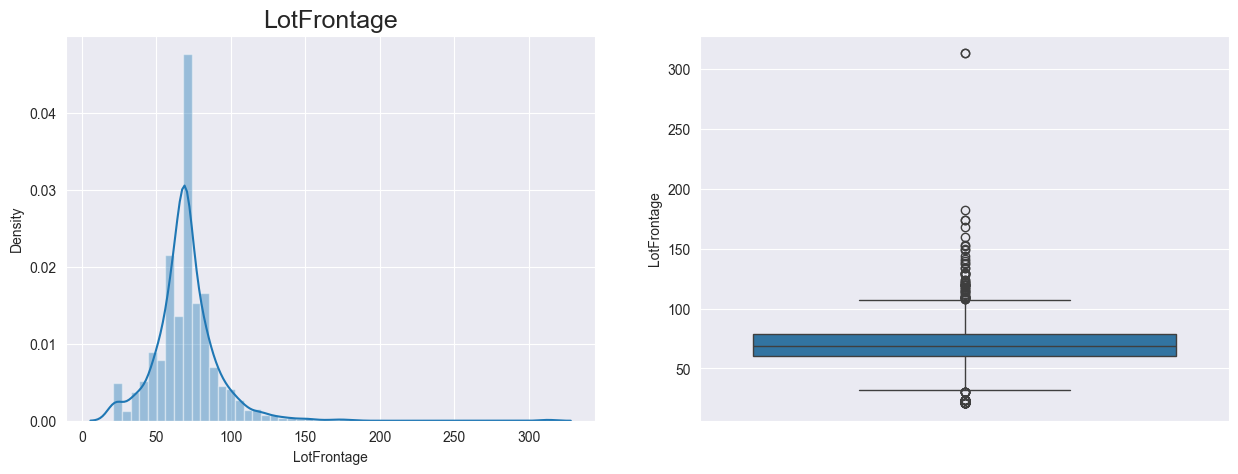

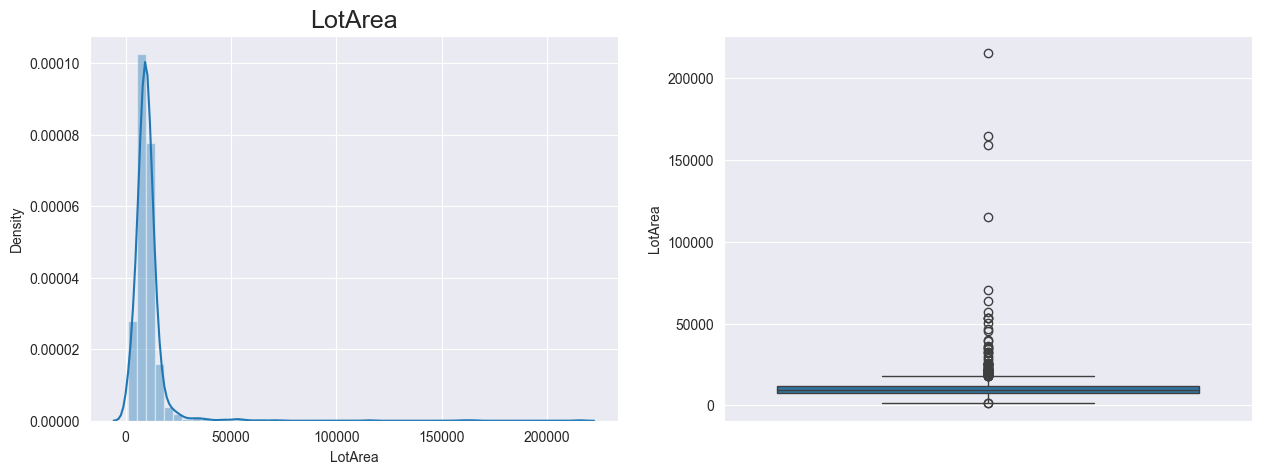

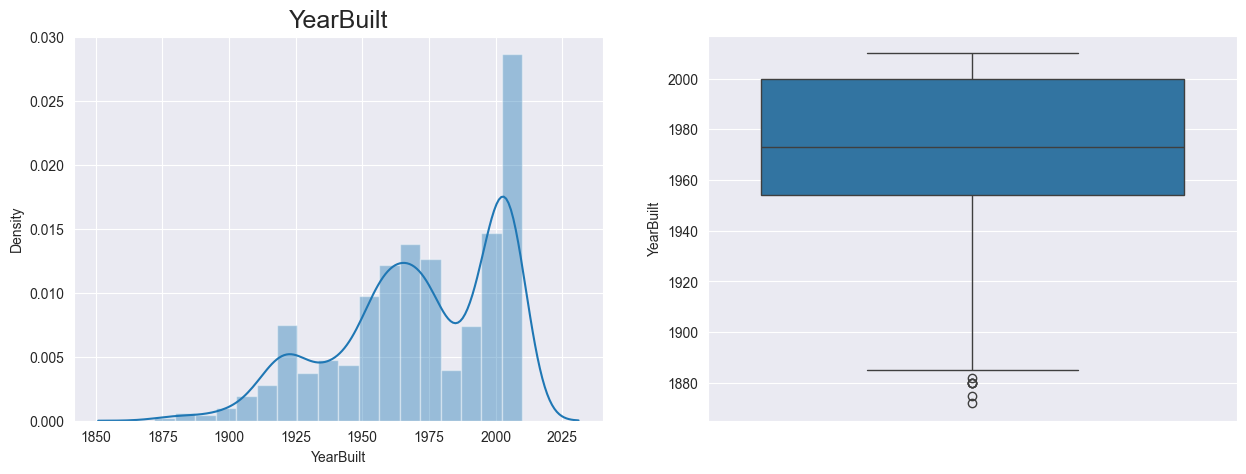

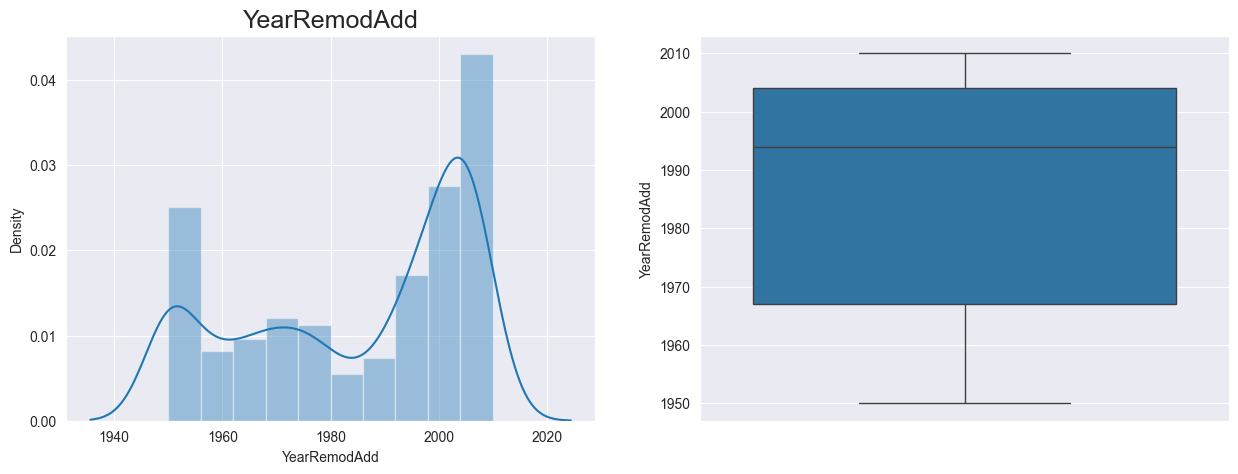

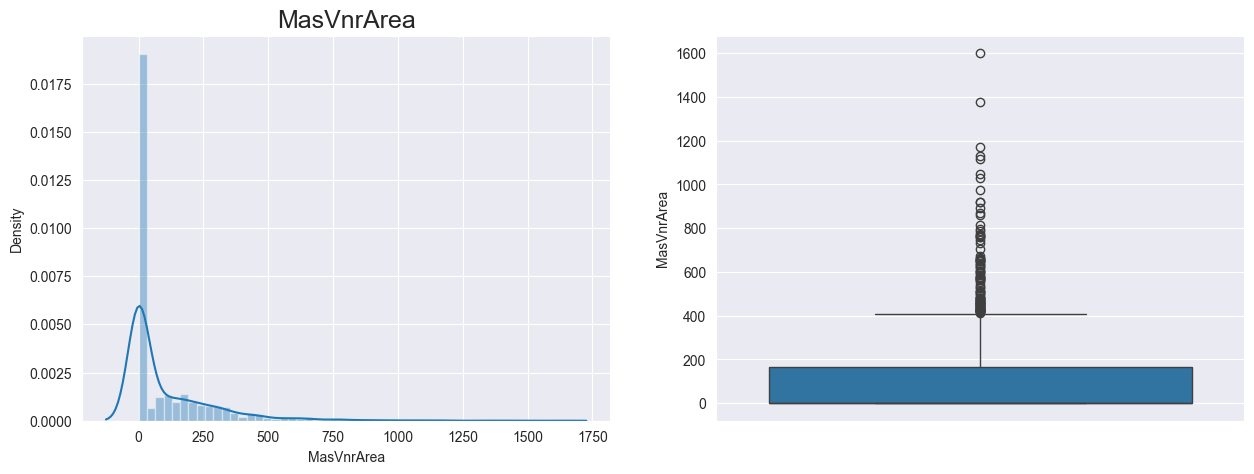

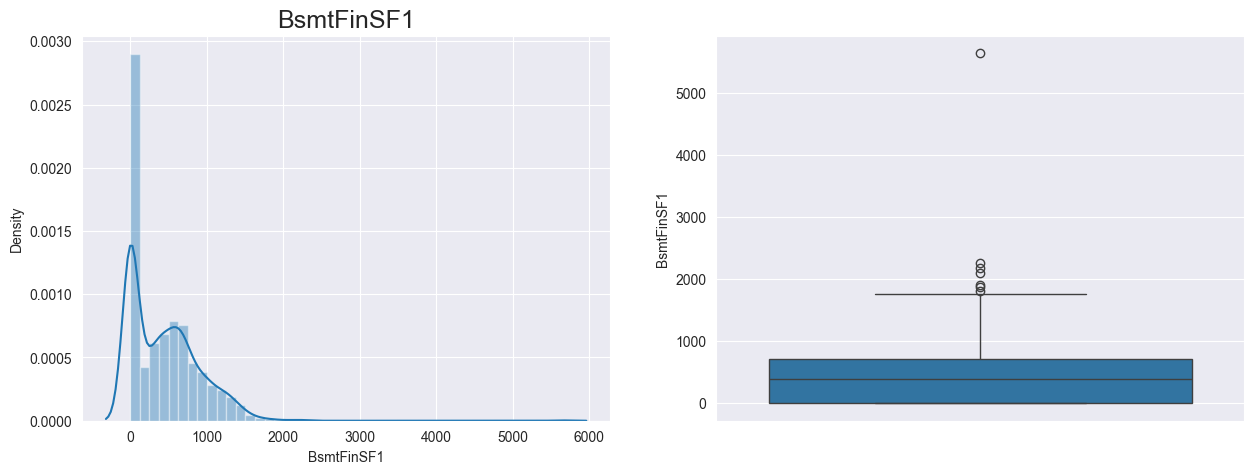

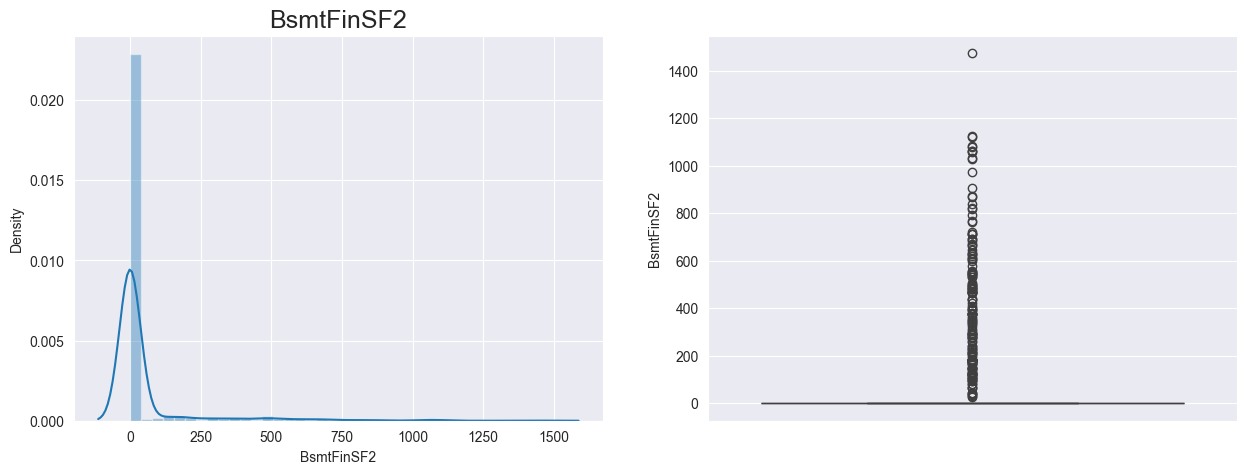

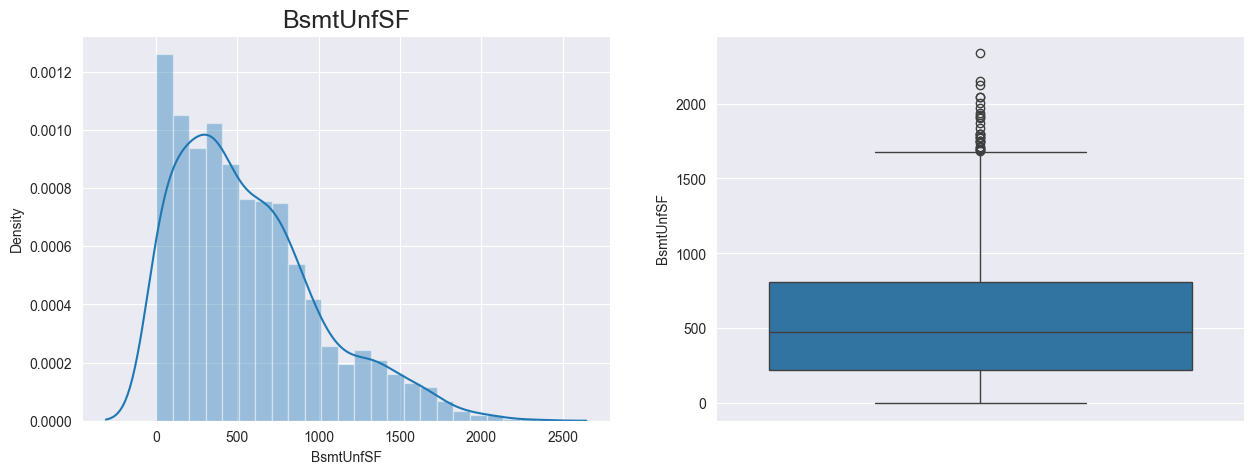

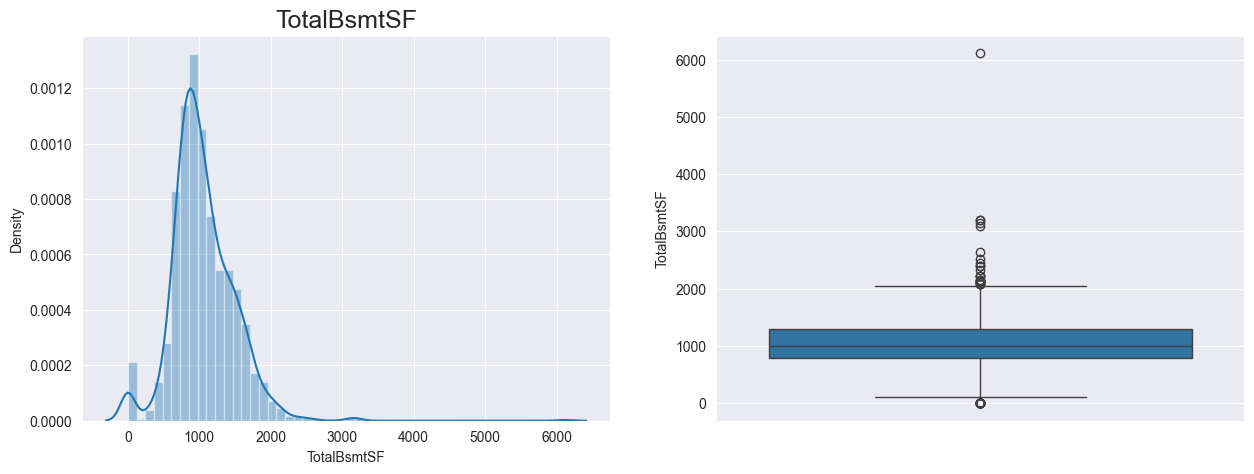

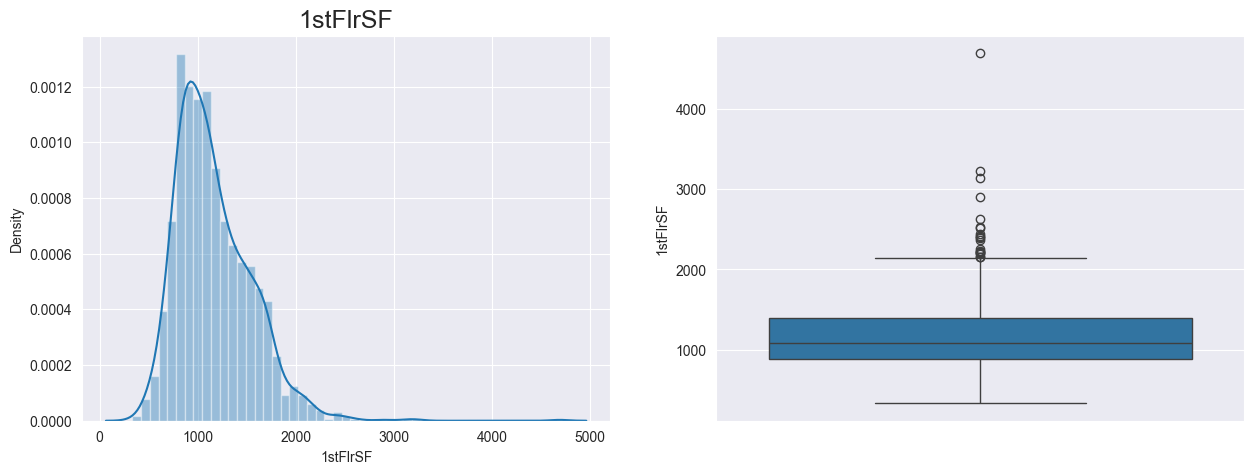

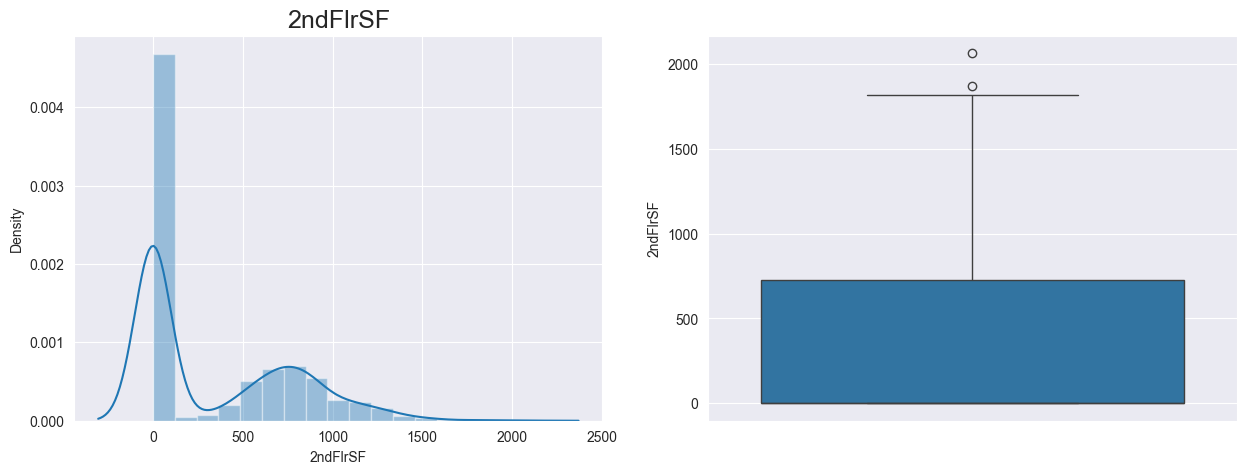

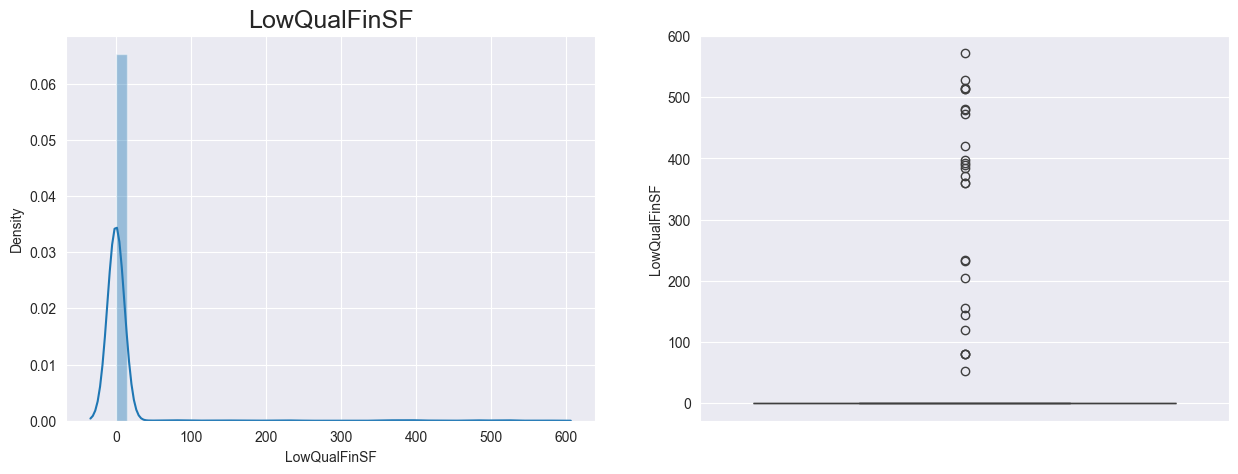

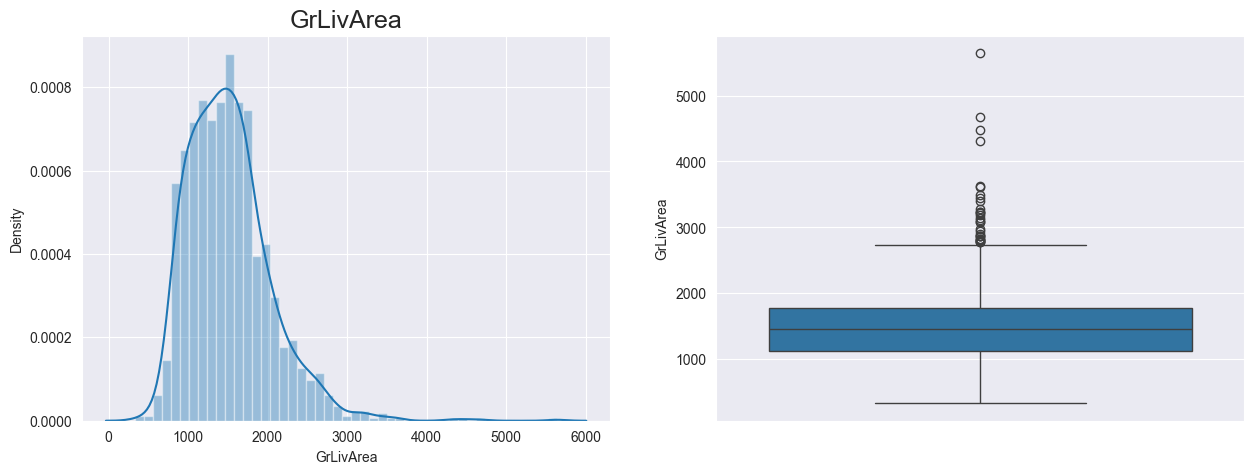

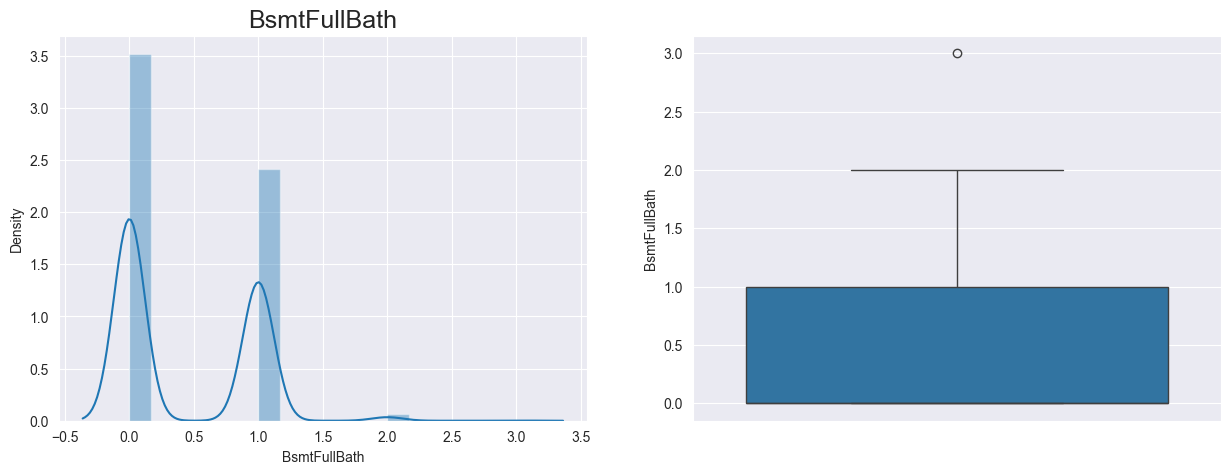

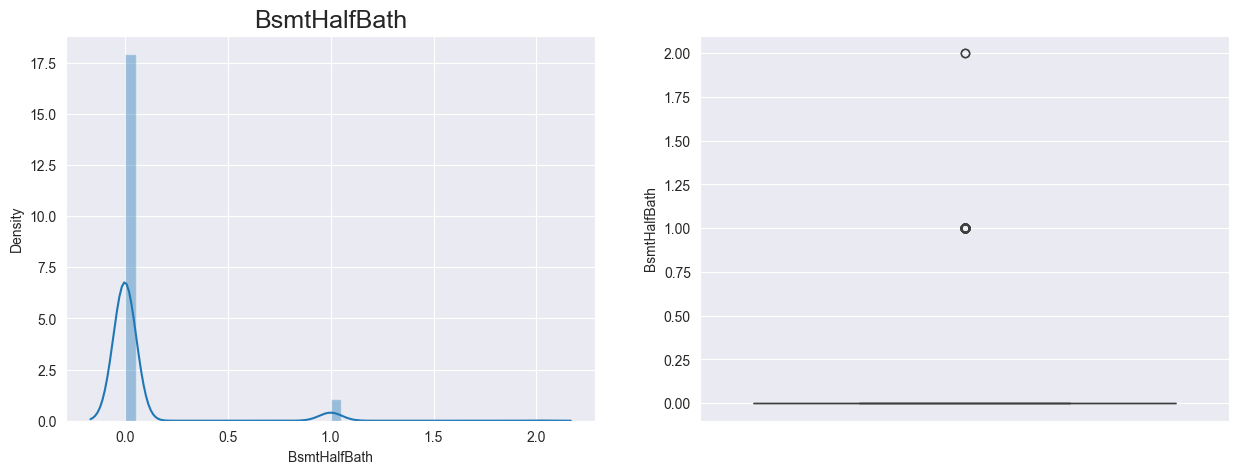

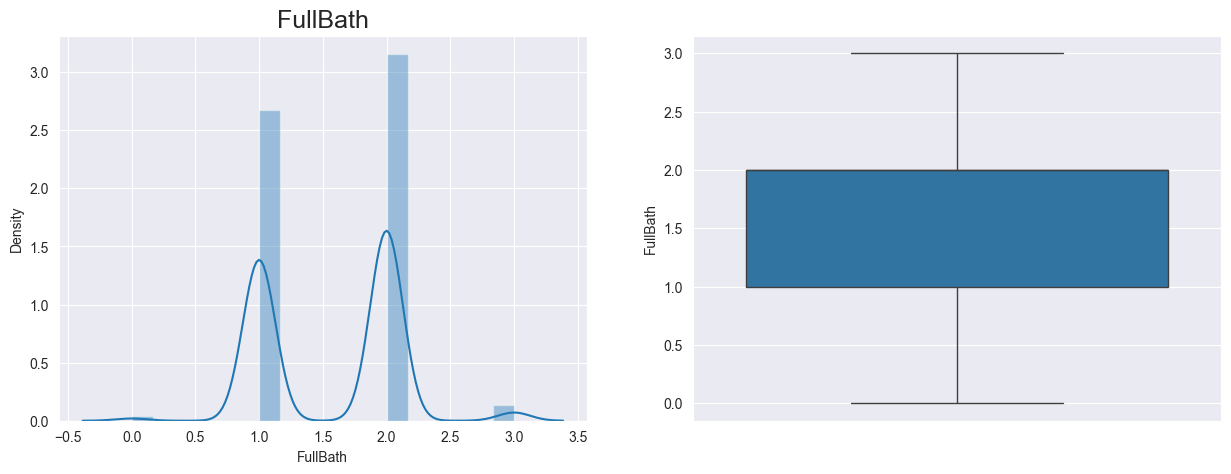

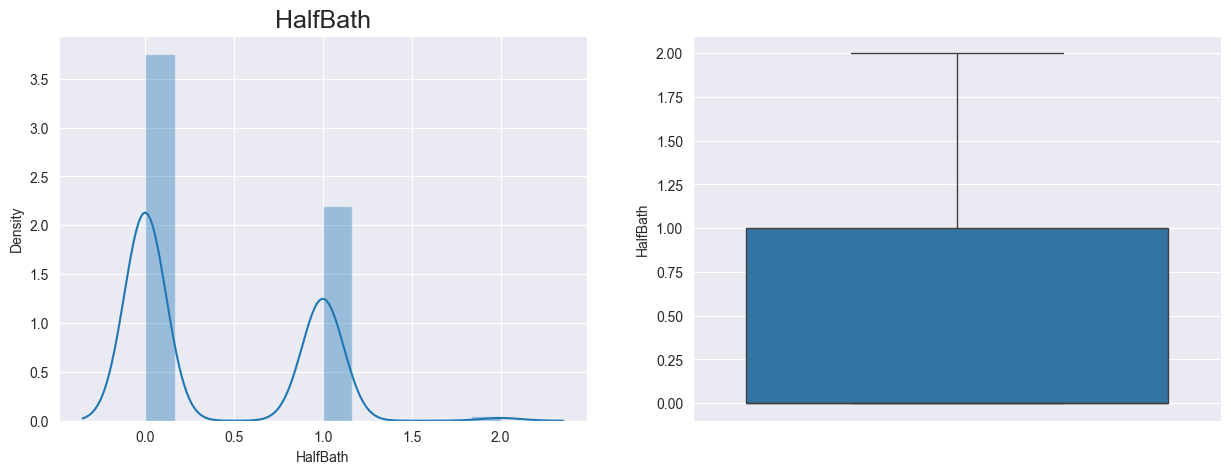

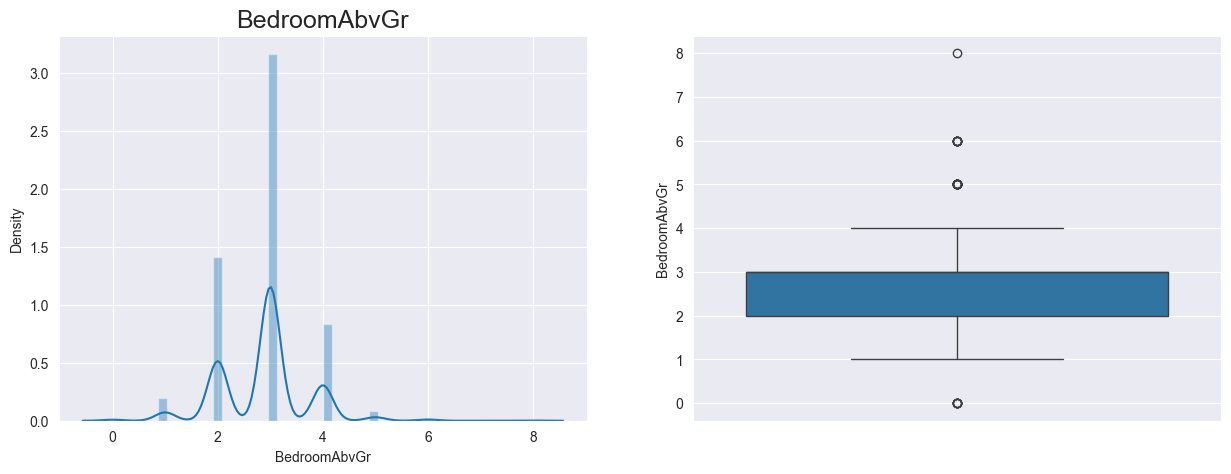

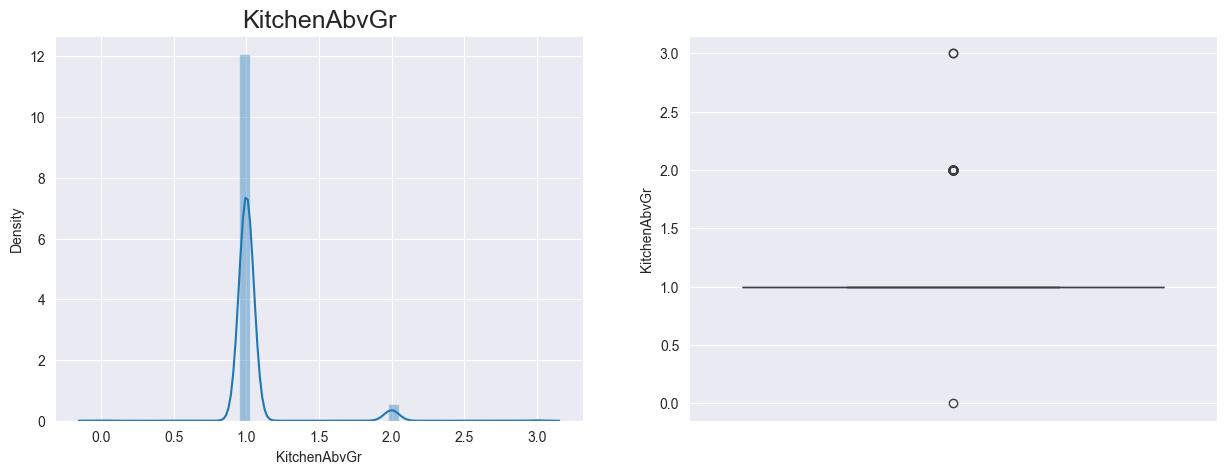

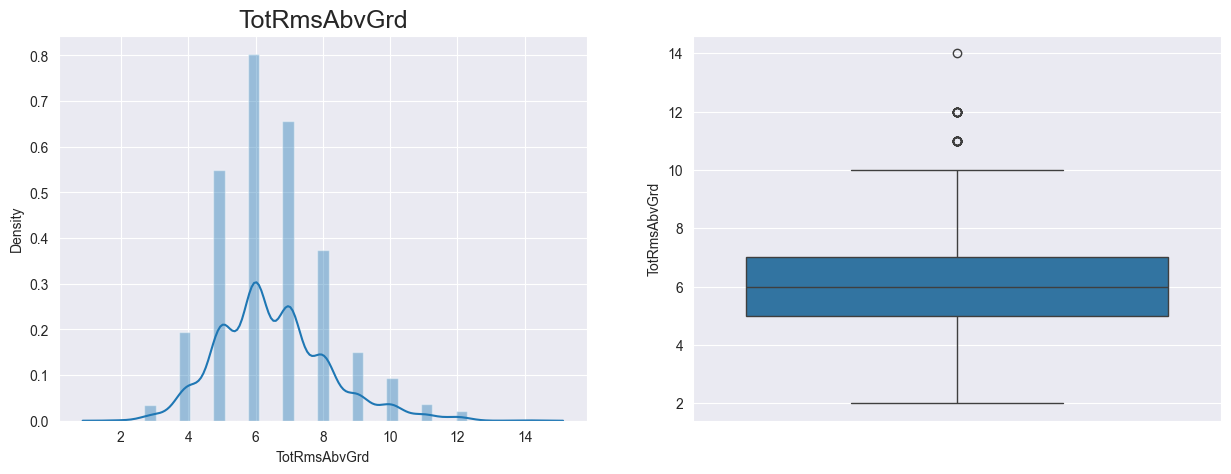

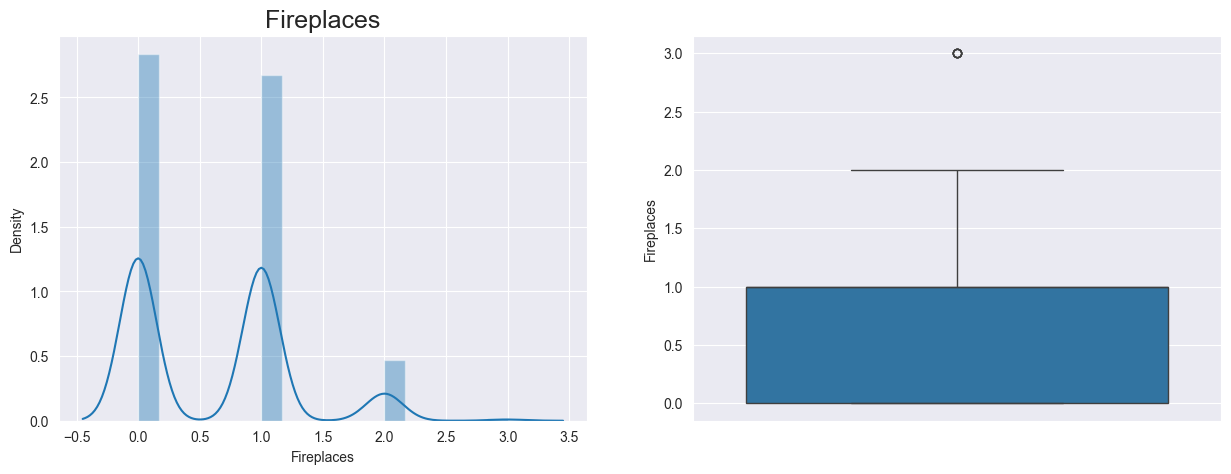

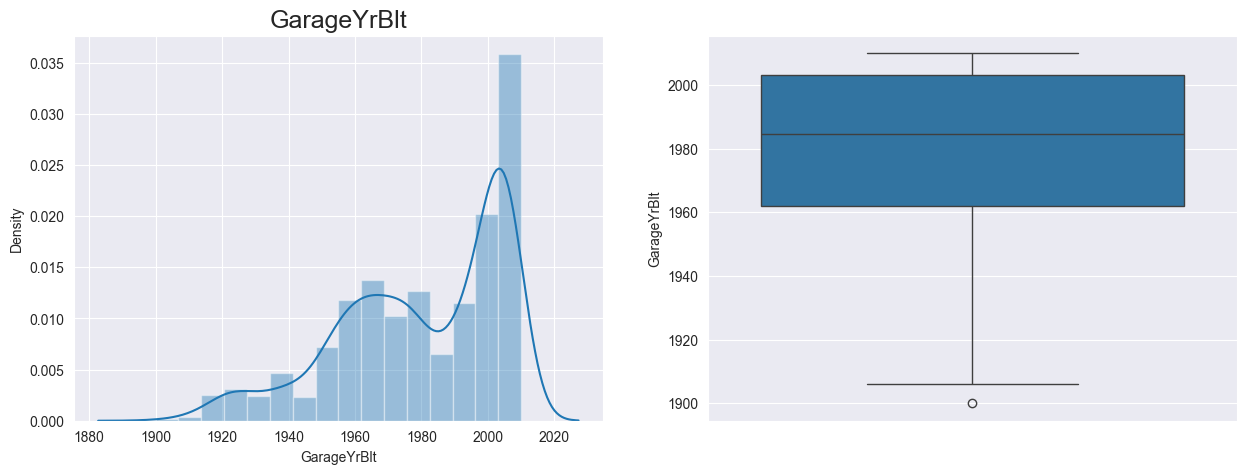

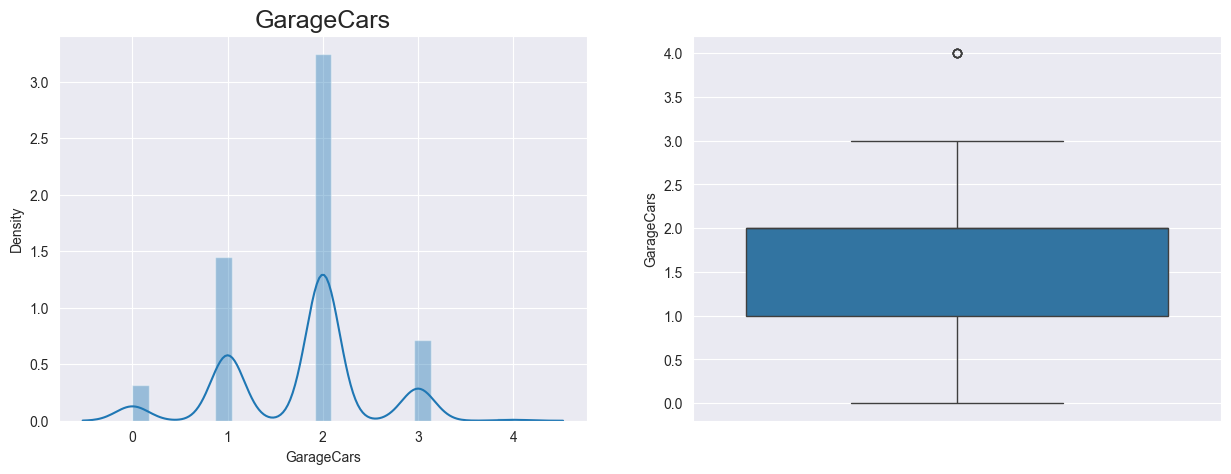

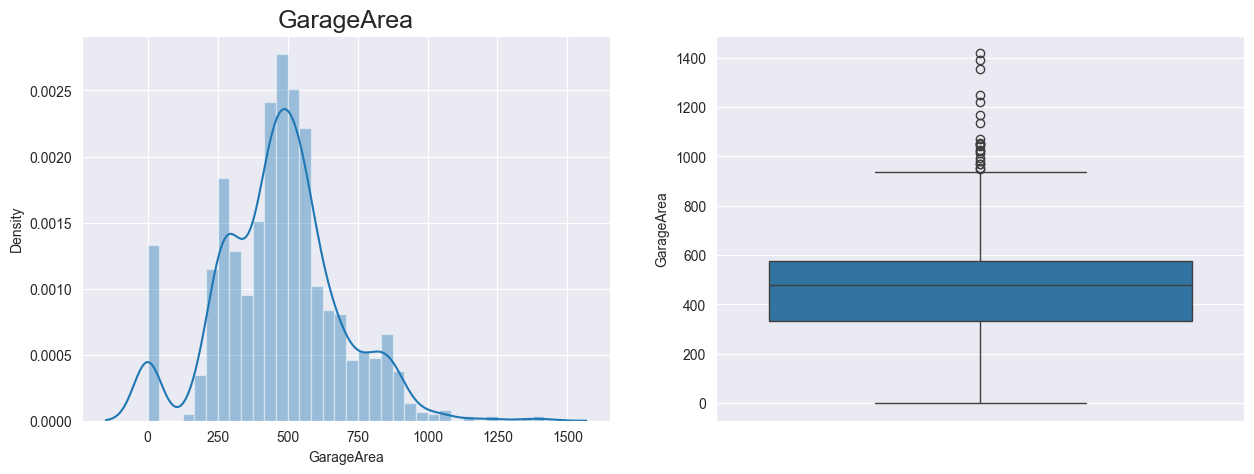

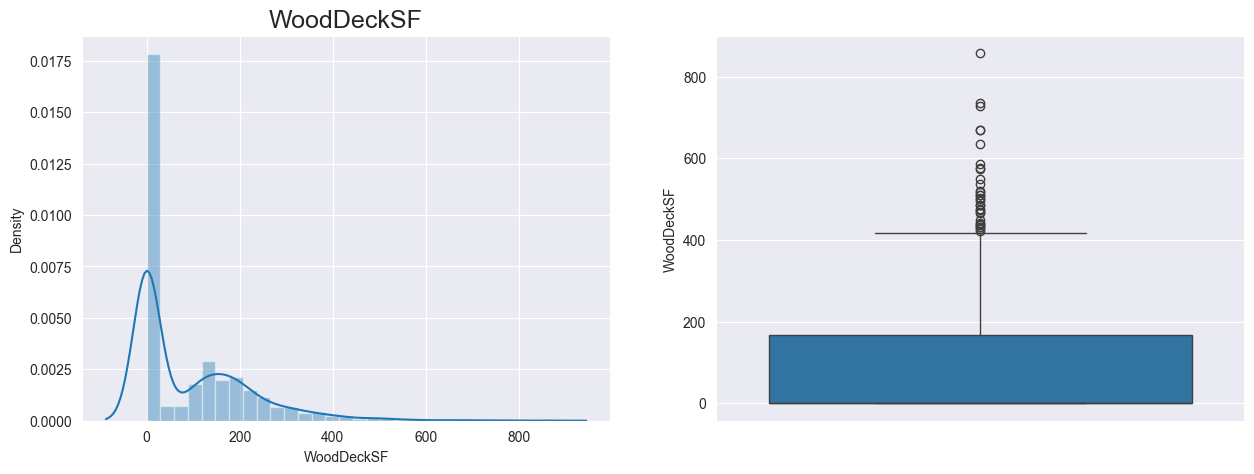

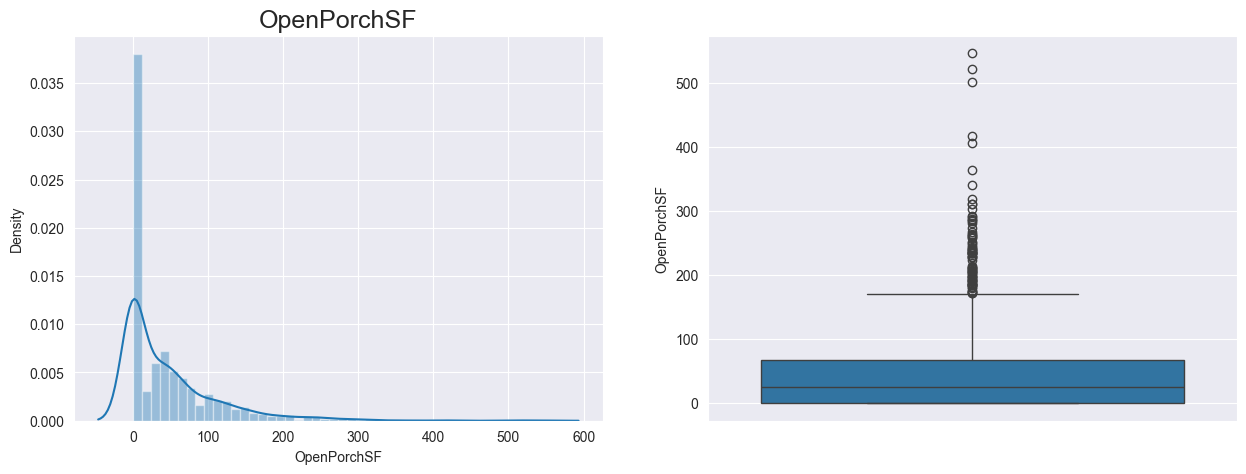

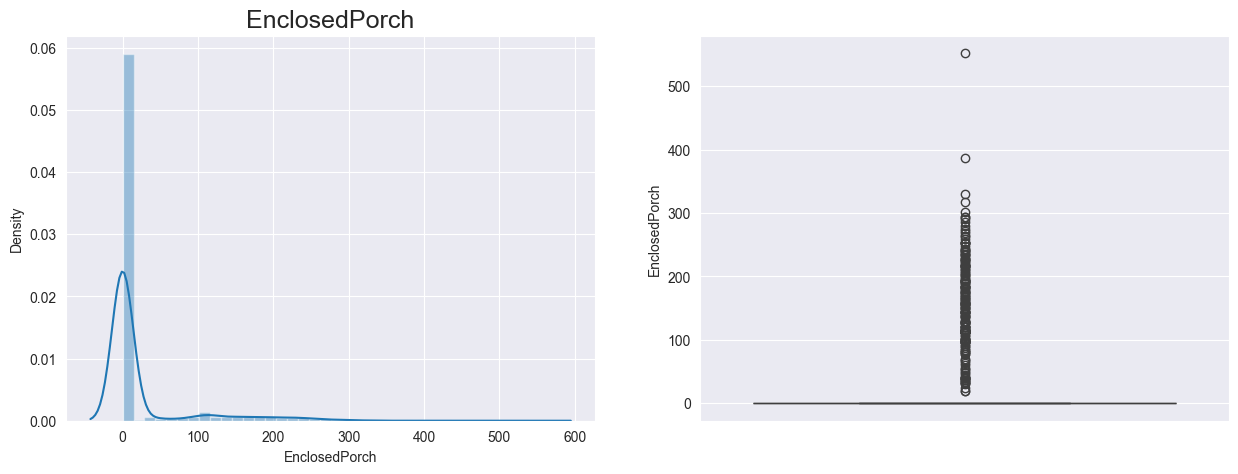

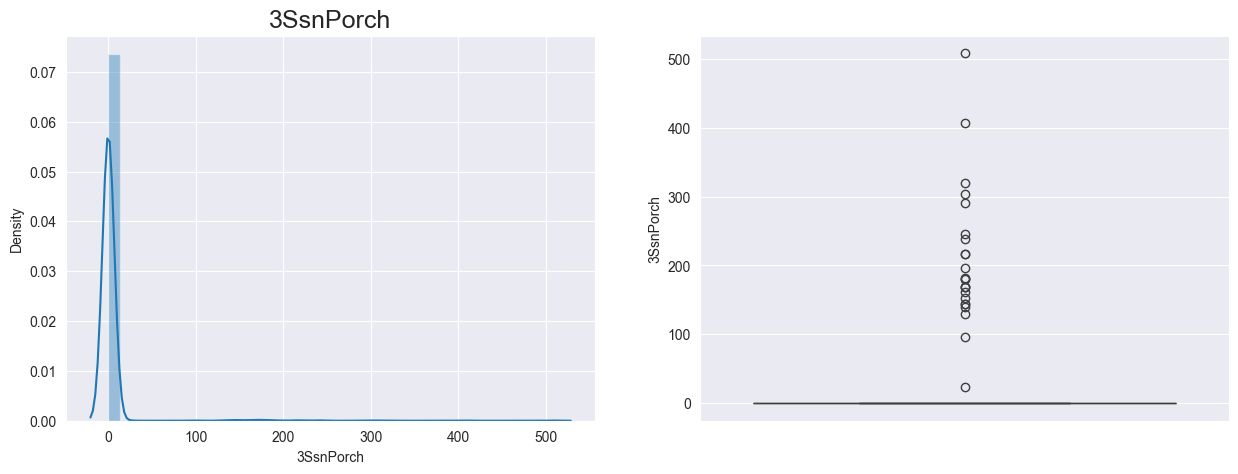

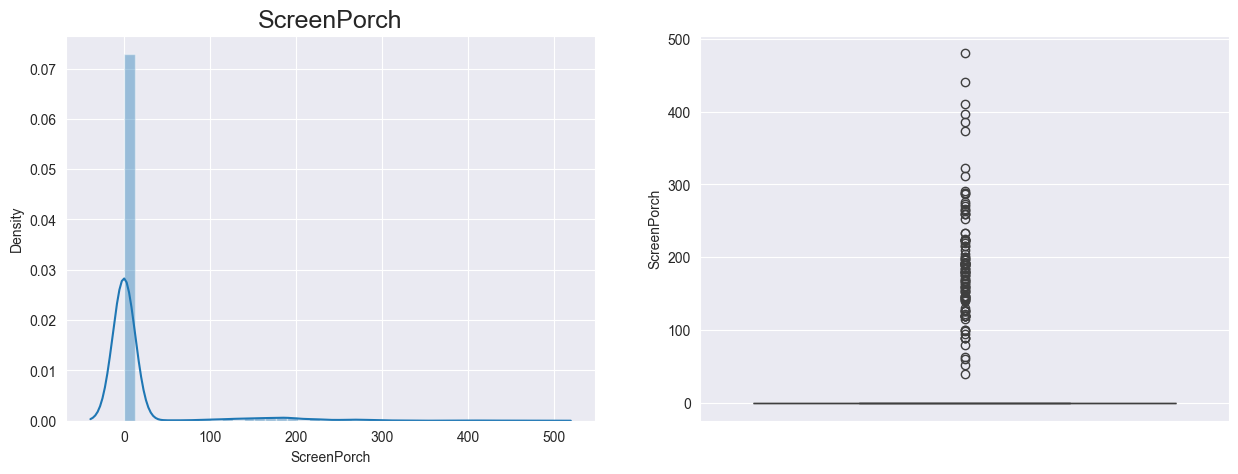

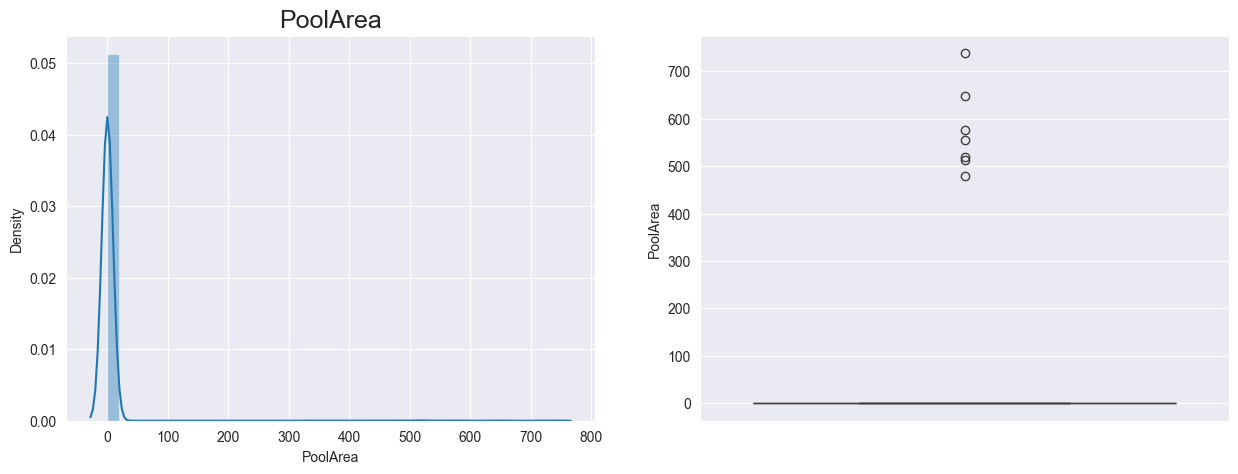

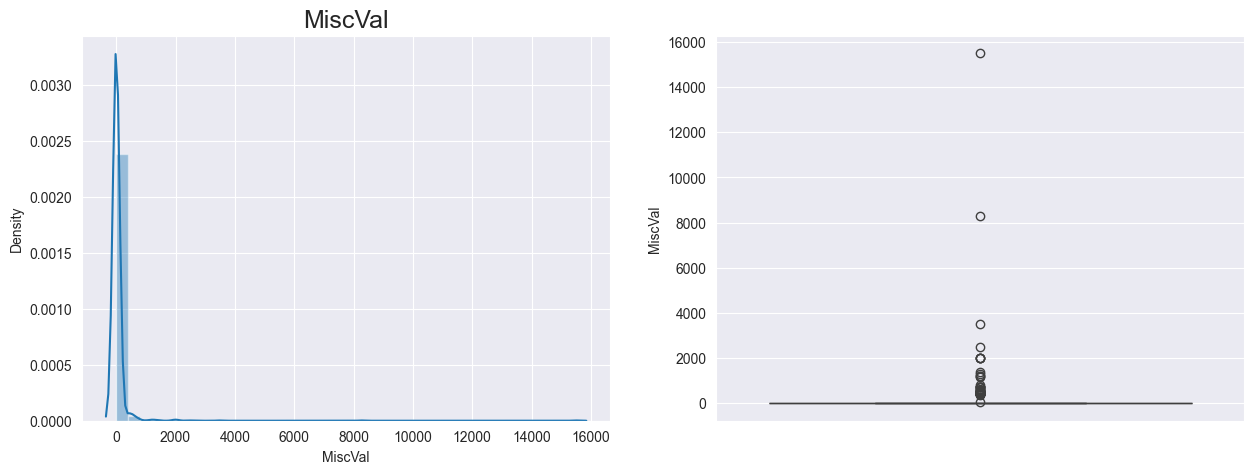

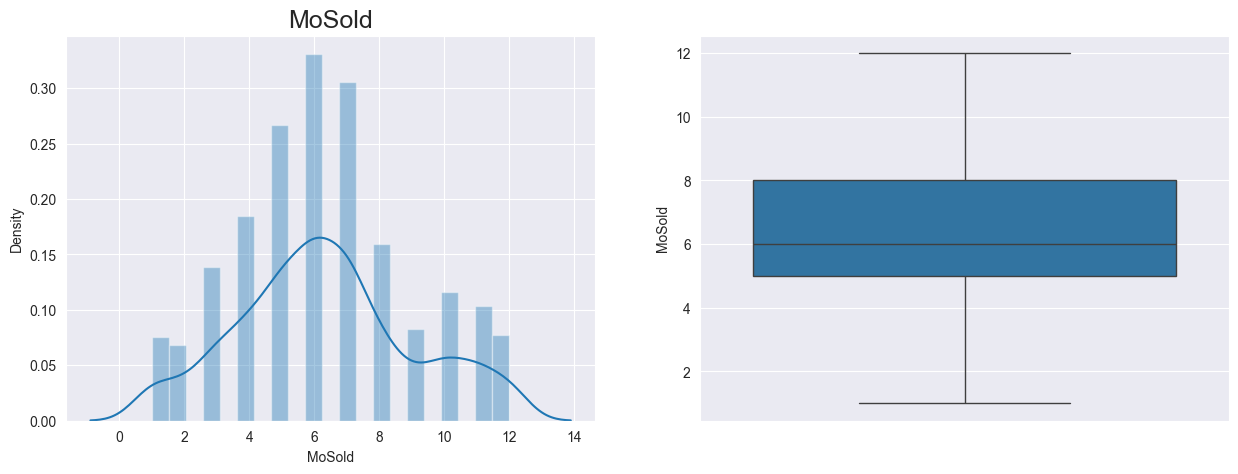

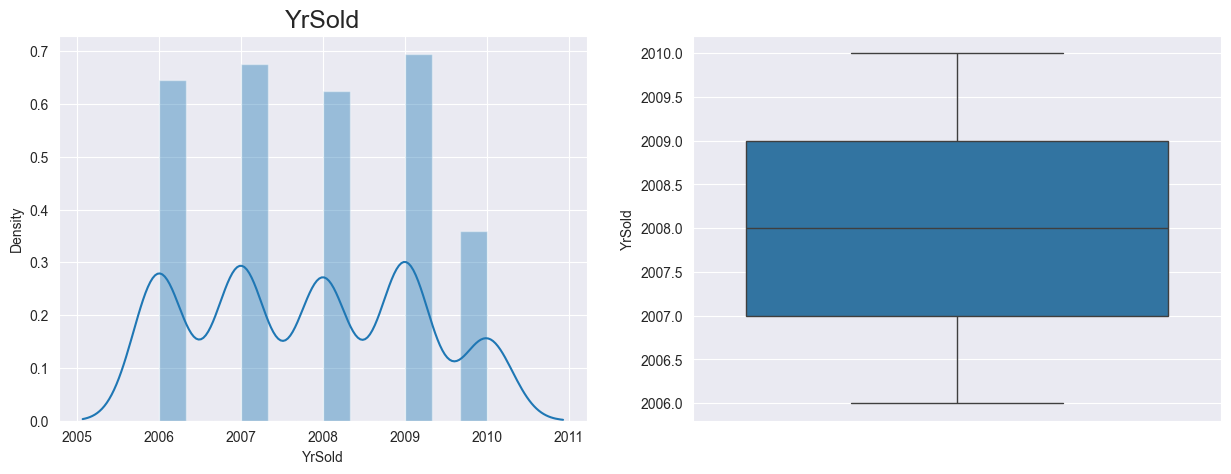

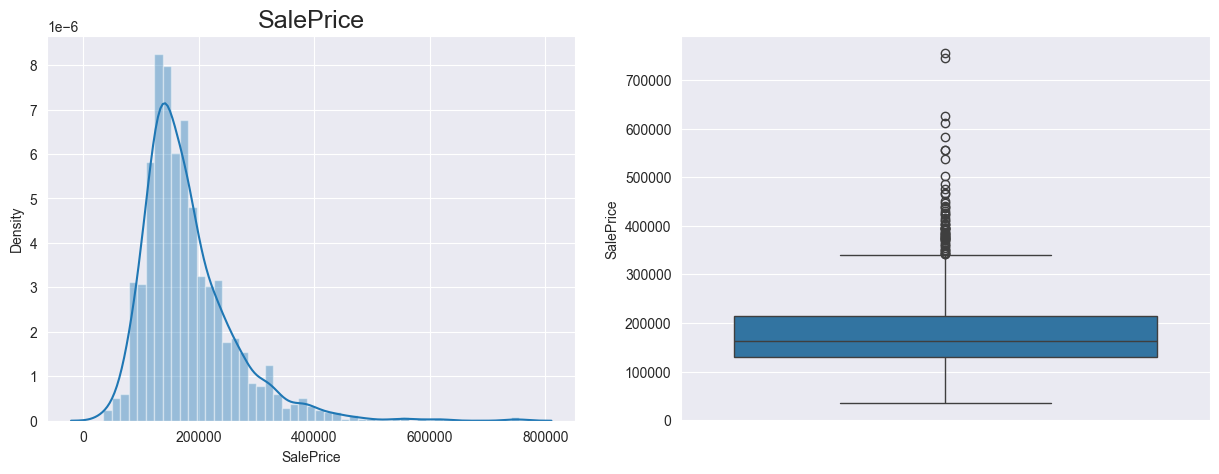

In [24]:
## View the distribution of all numeric variables using histograms and boxplots

for col in df_num.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(df_num[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(df_num[col])
    plt.show()

## EDA on Categorical Columns

In [25]:
## View the unique values of all Categorical columns
for col in df_cat.columns:
    print(col)
    print(df[col].unique(), '\n')

MSSubClass
[60 20 70 50 190 45 90 120 30 85 80 160 75 180 40] 

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH'] 

Street
['Pave' 'Grvl'] 

LotShape
['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour
['Lvl' 'Bnk' 'Low' 'HLS'] 

Utilities
['AllPub' 'NoSeWa'] 

LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

LandSlope
['Gtl' 'Mod' 'Sev'] 

Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 

Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 

BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 

HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 

OverallQual
[7 6 8 5 9 4 10 3 1 2] 

OverallCond
[5 8 6 7 4 2 3 9 1] 

RoofStyle
['Gable' 'Hip' 'Gambrel' 'Mansard' '

In [26]:
df.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1         60       RL         65.0     8450   Pave      Reg         Lvl   
1   2         20       RL         80.0     9600   Pave      Reg         Lvl   
2   3         60       RL         68.0    11250   Pave      IR1         Lvl   
3   4         70       RL         60.0     9550   Pave      IR1         Lvl   
4   5         60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold YrSold SaleType  SaleCondition  SalePrice  
0       0      2   2008       WD         Normal     208500  
1       0      5   2007       WD         Normal     181500  
2       0      9   2008       WD         Normal     223500  
3       0      2   2006       WD        Abnorml     140000  
4       0     12   2008       WD         Normal     250000  

[5 rows x 75 columns]

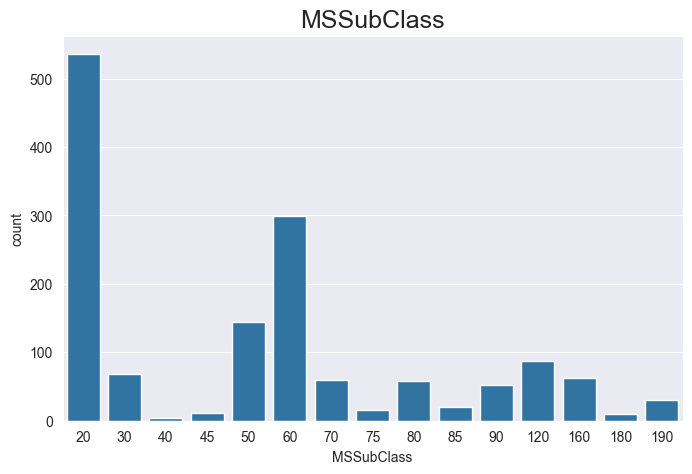

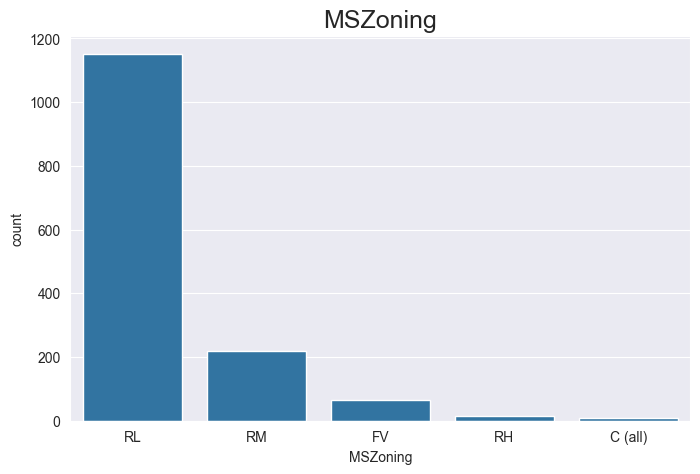

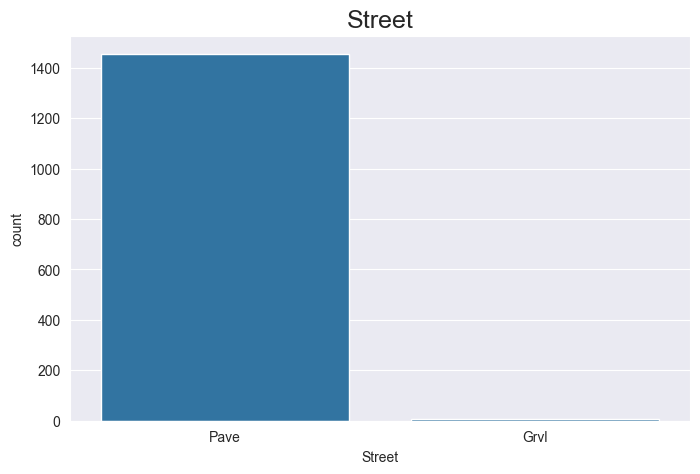

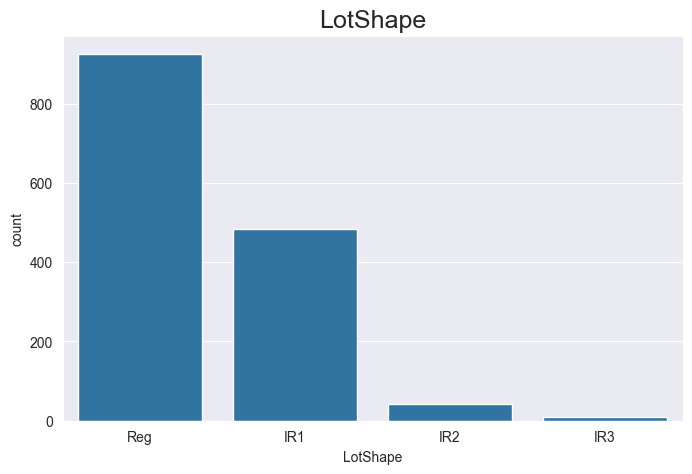

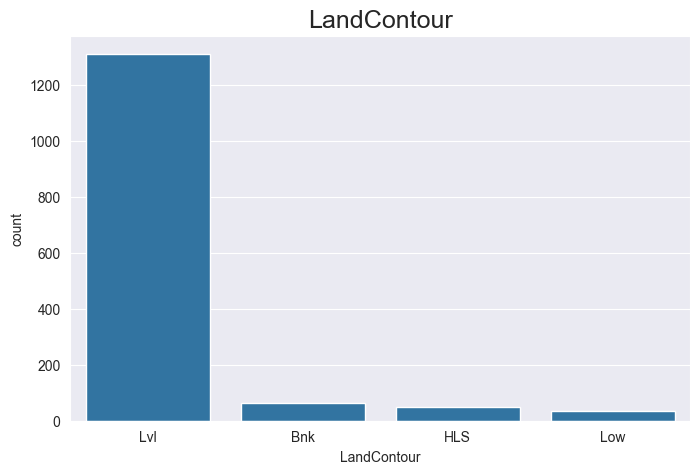

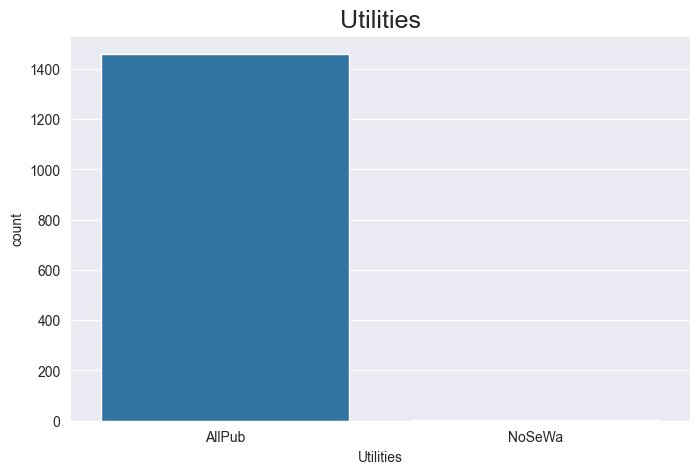

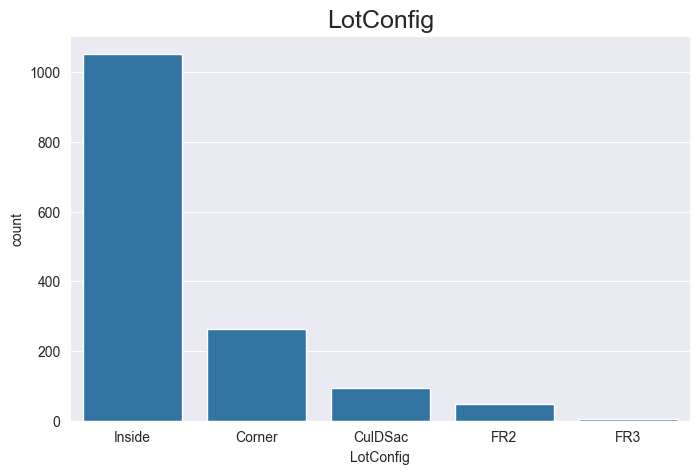

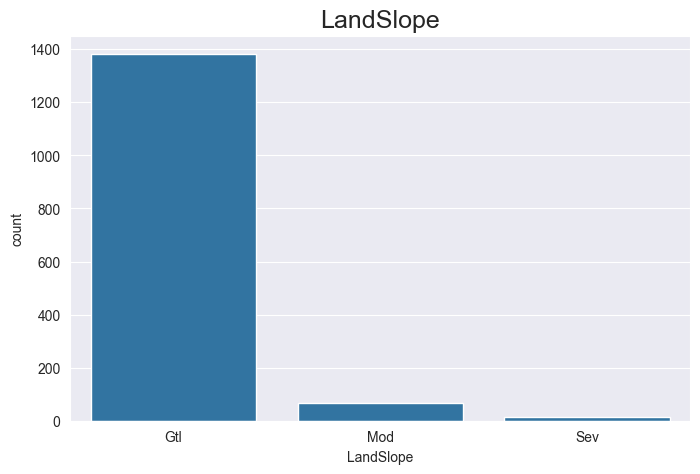

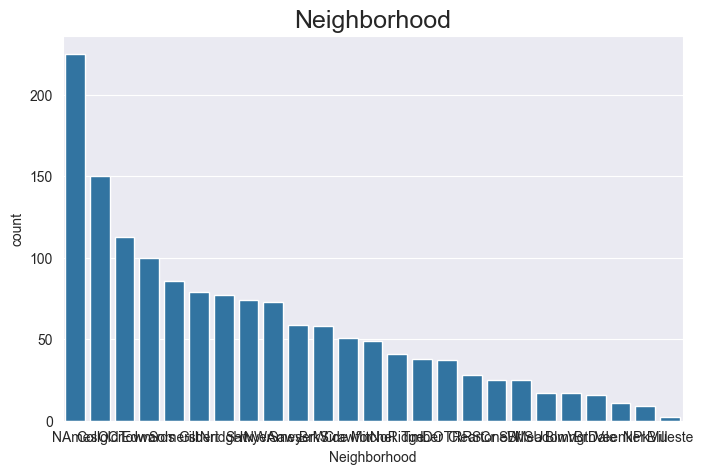

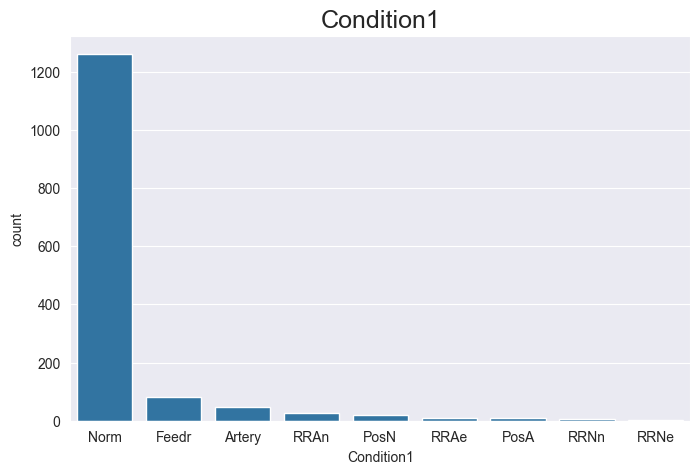

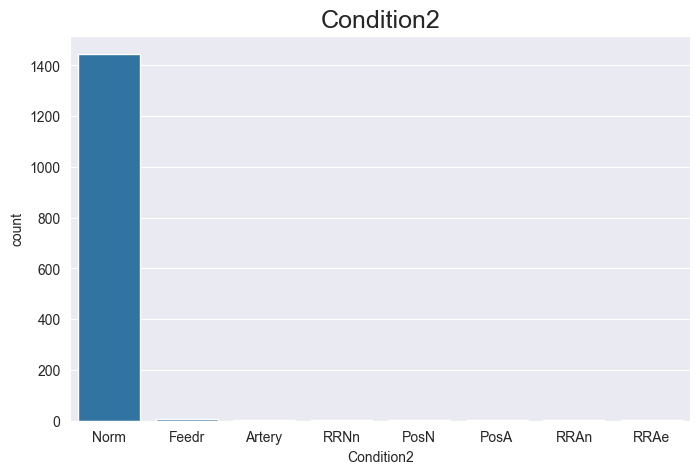

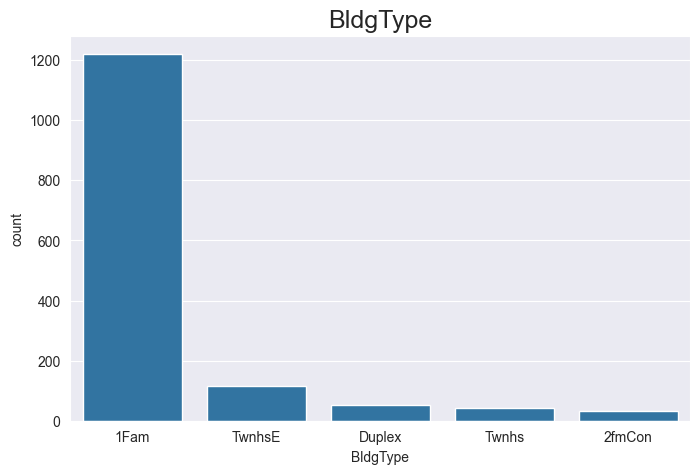

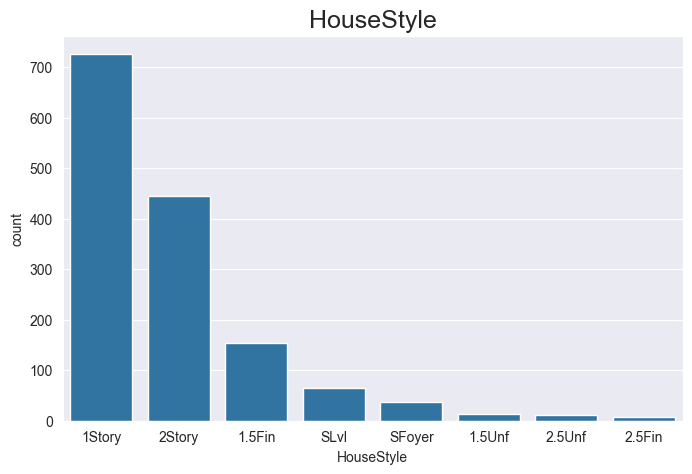

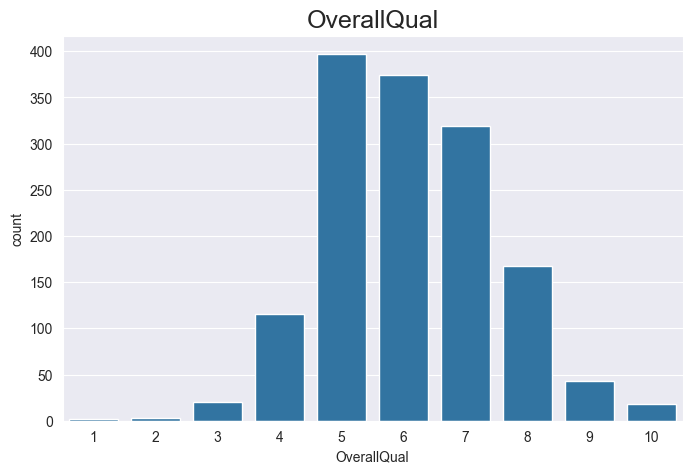

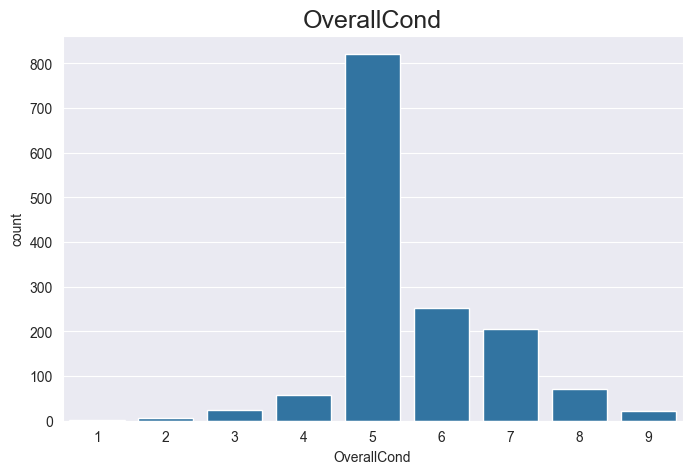

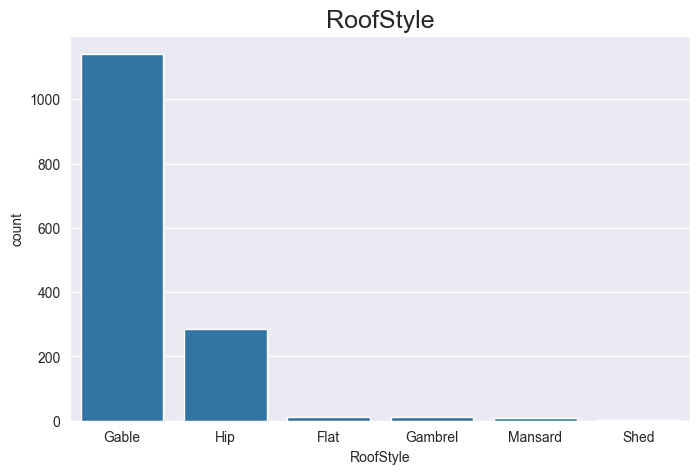

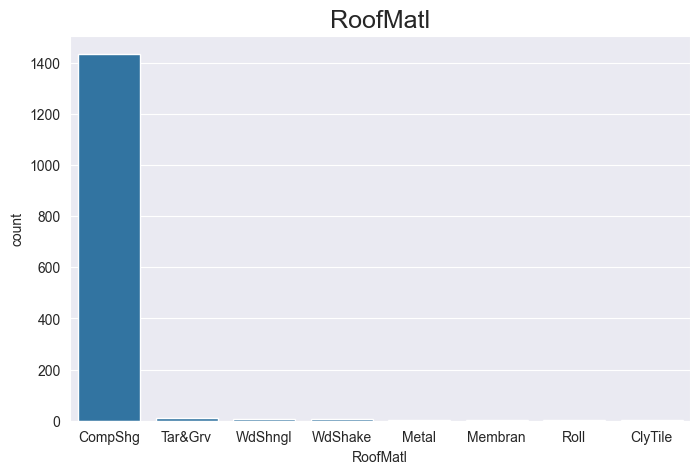

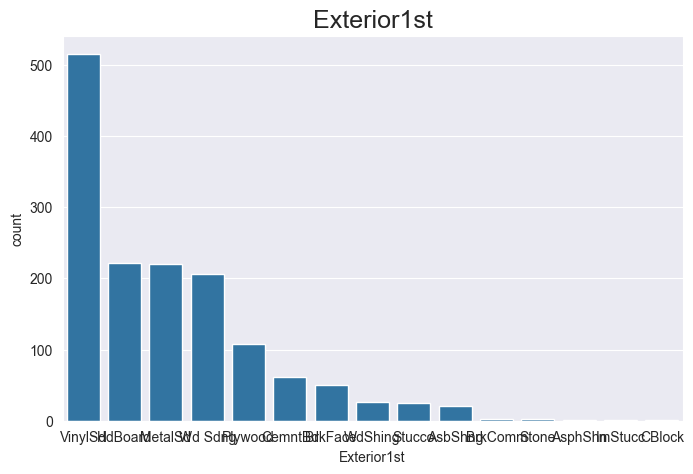

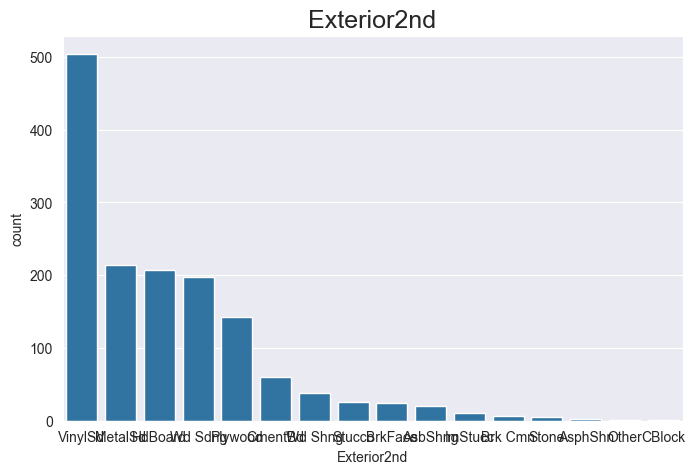

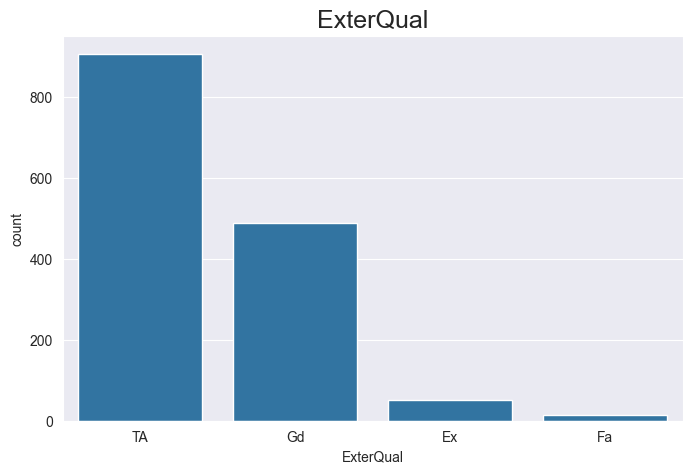

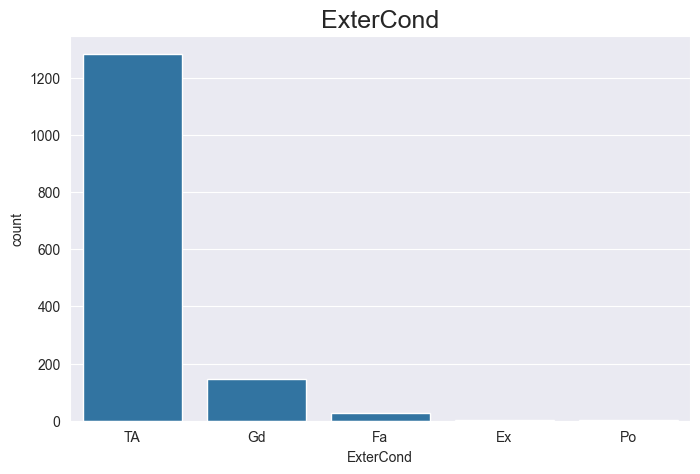

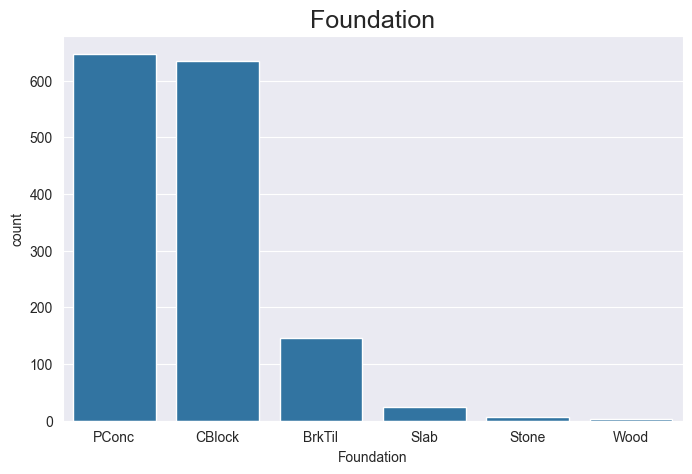

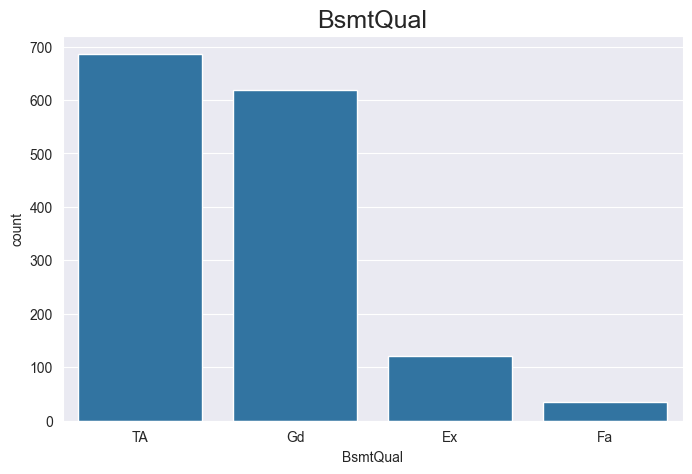

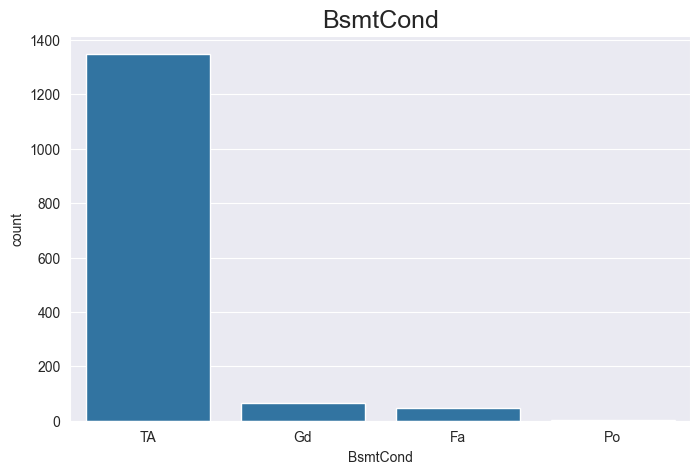

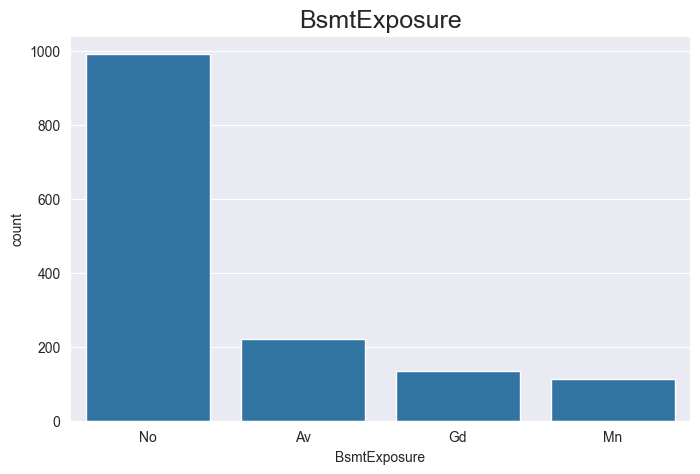

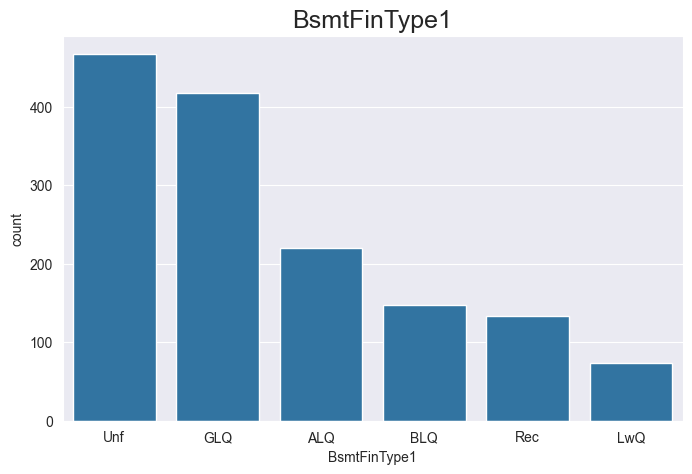

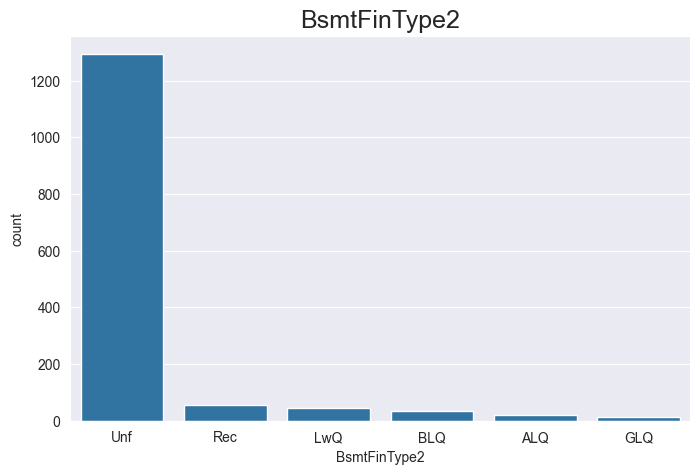

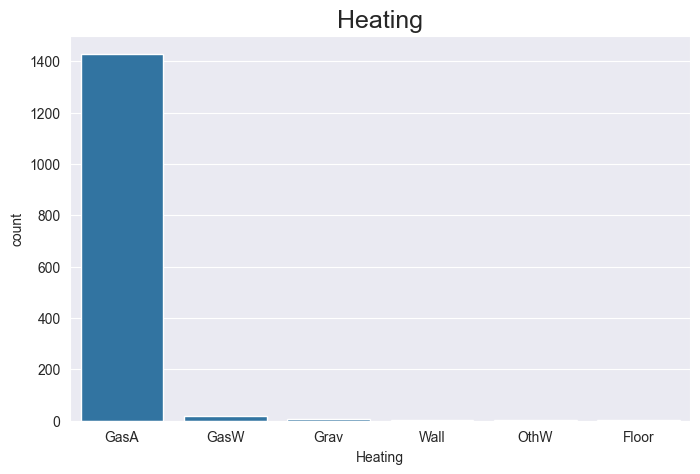

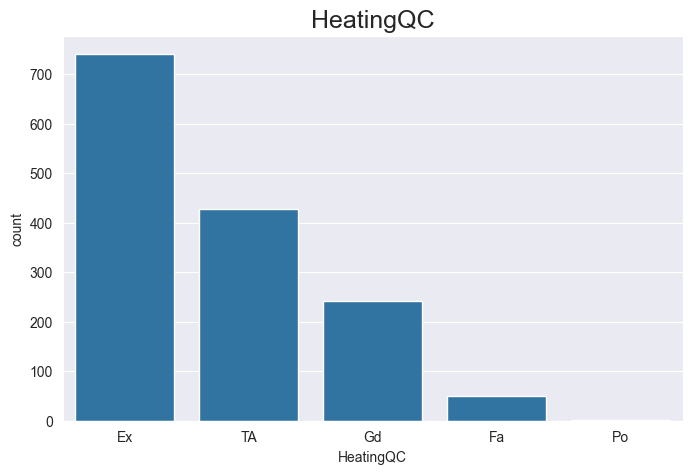

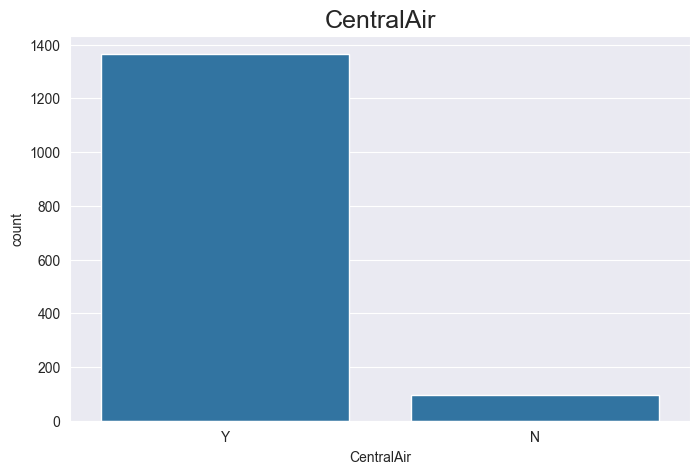

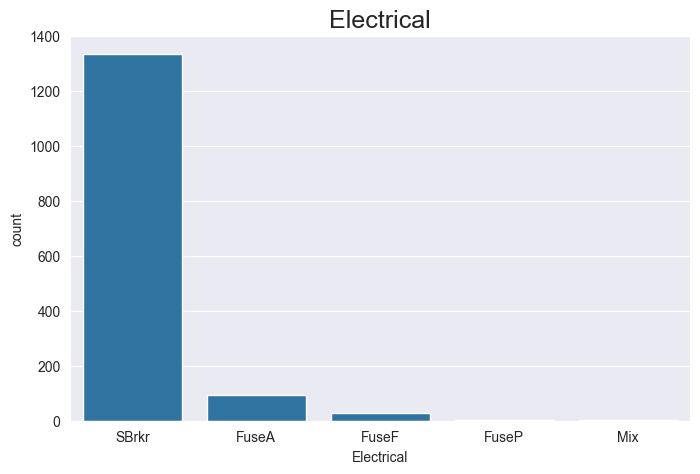

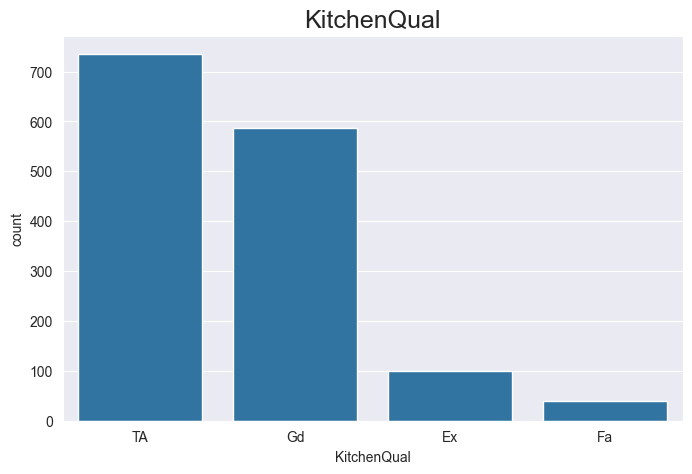

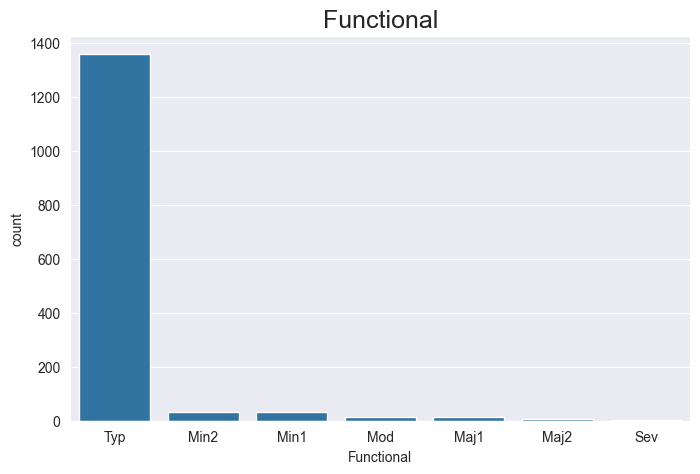

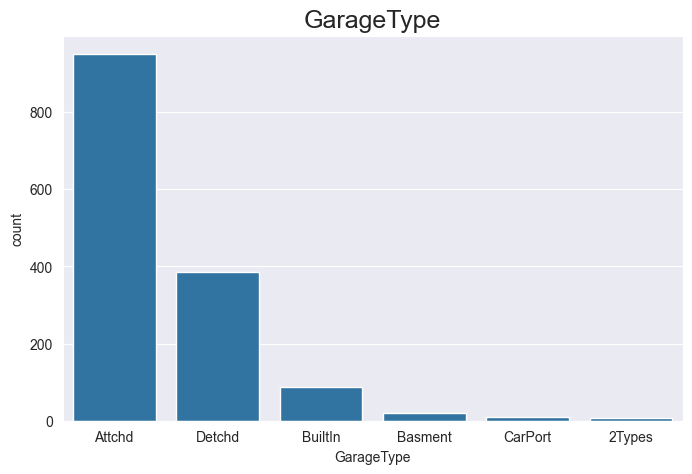

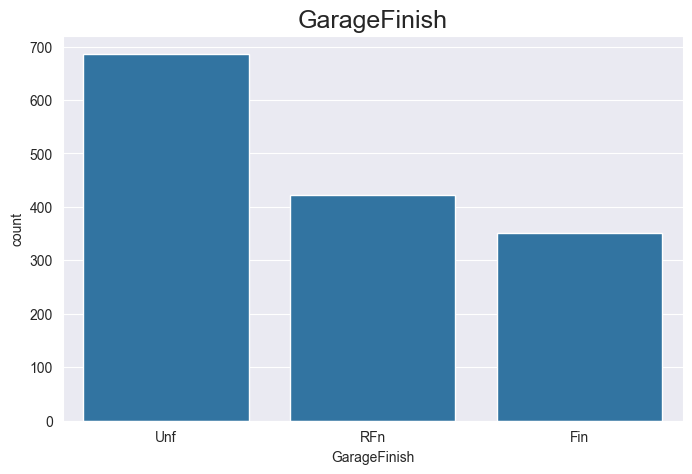

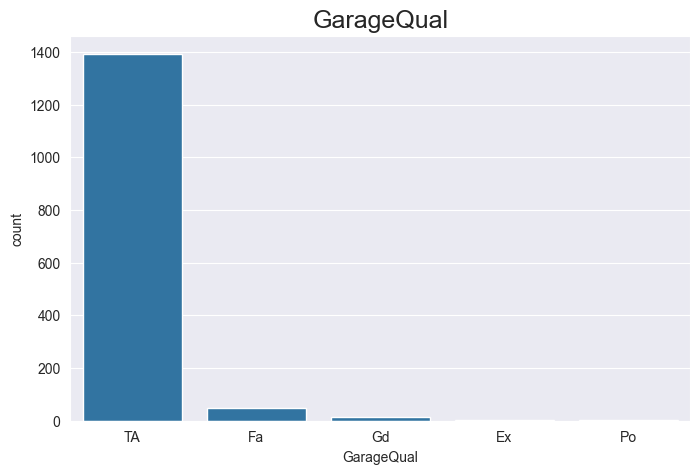

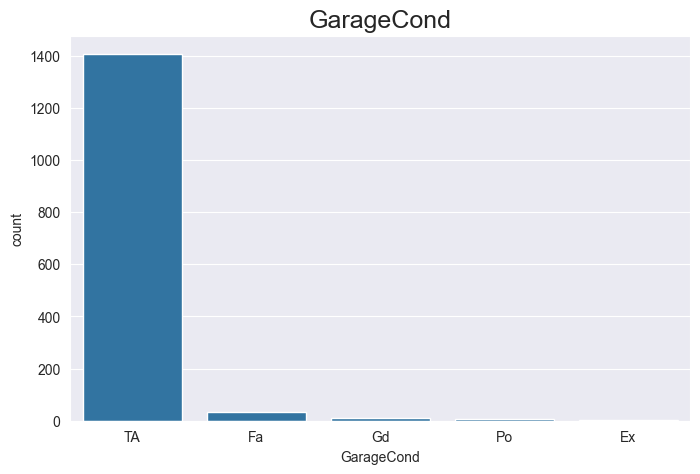

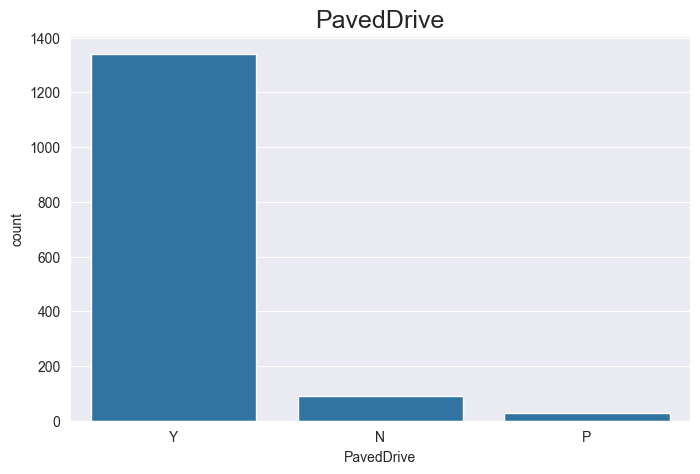

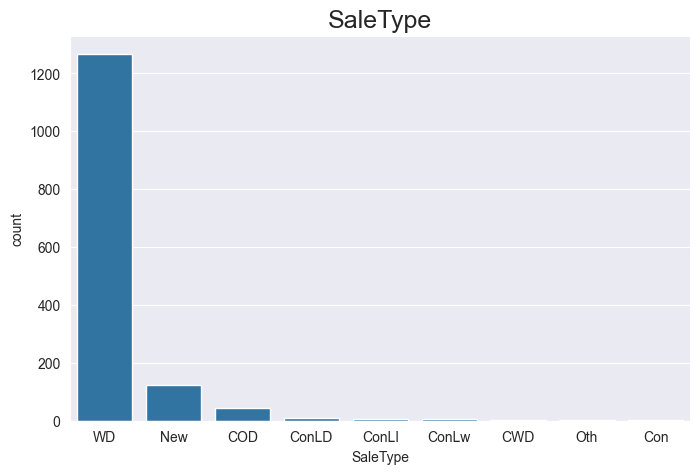

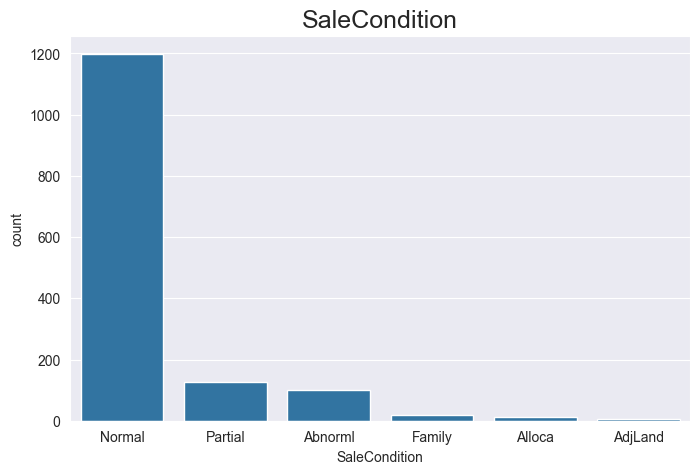

In [27]:
## Visualizing the levels of categorical columns using bar plots
for col in df_cat.columns:
    plt.figure(figsize=(8,5))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(x=df_cat[col].value_counts().index, y=df_cat[col].value_counts())
    plt.show()

## Bivariate Analysis

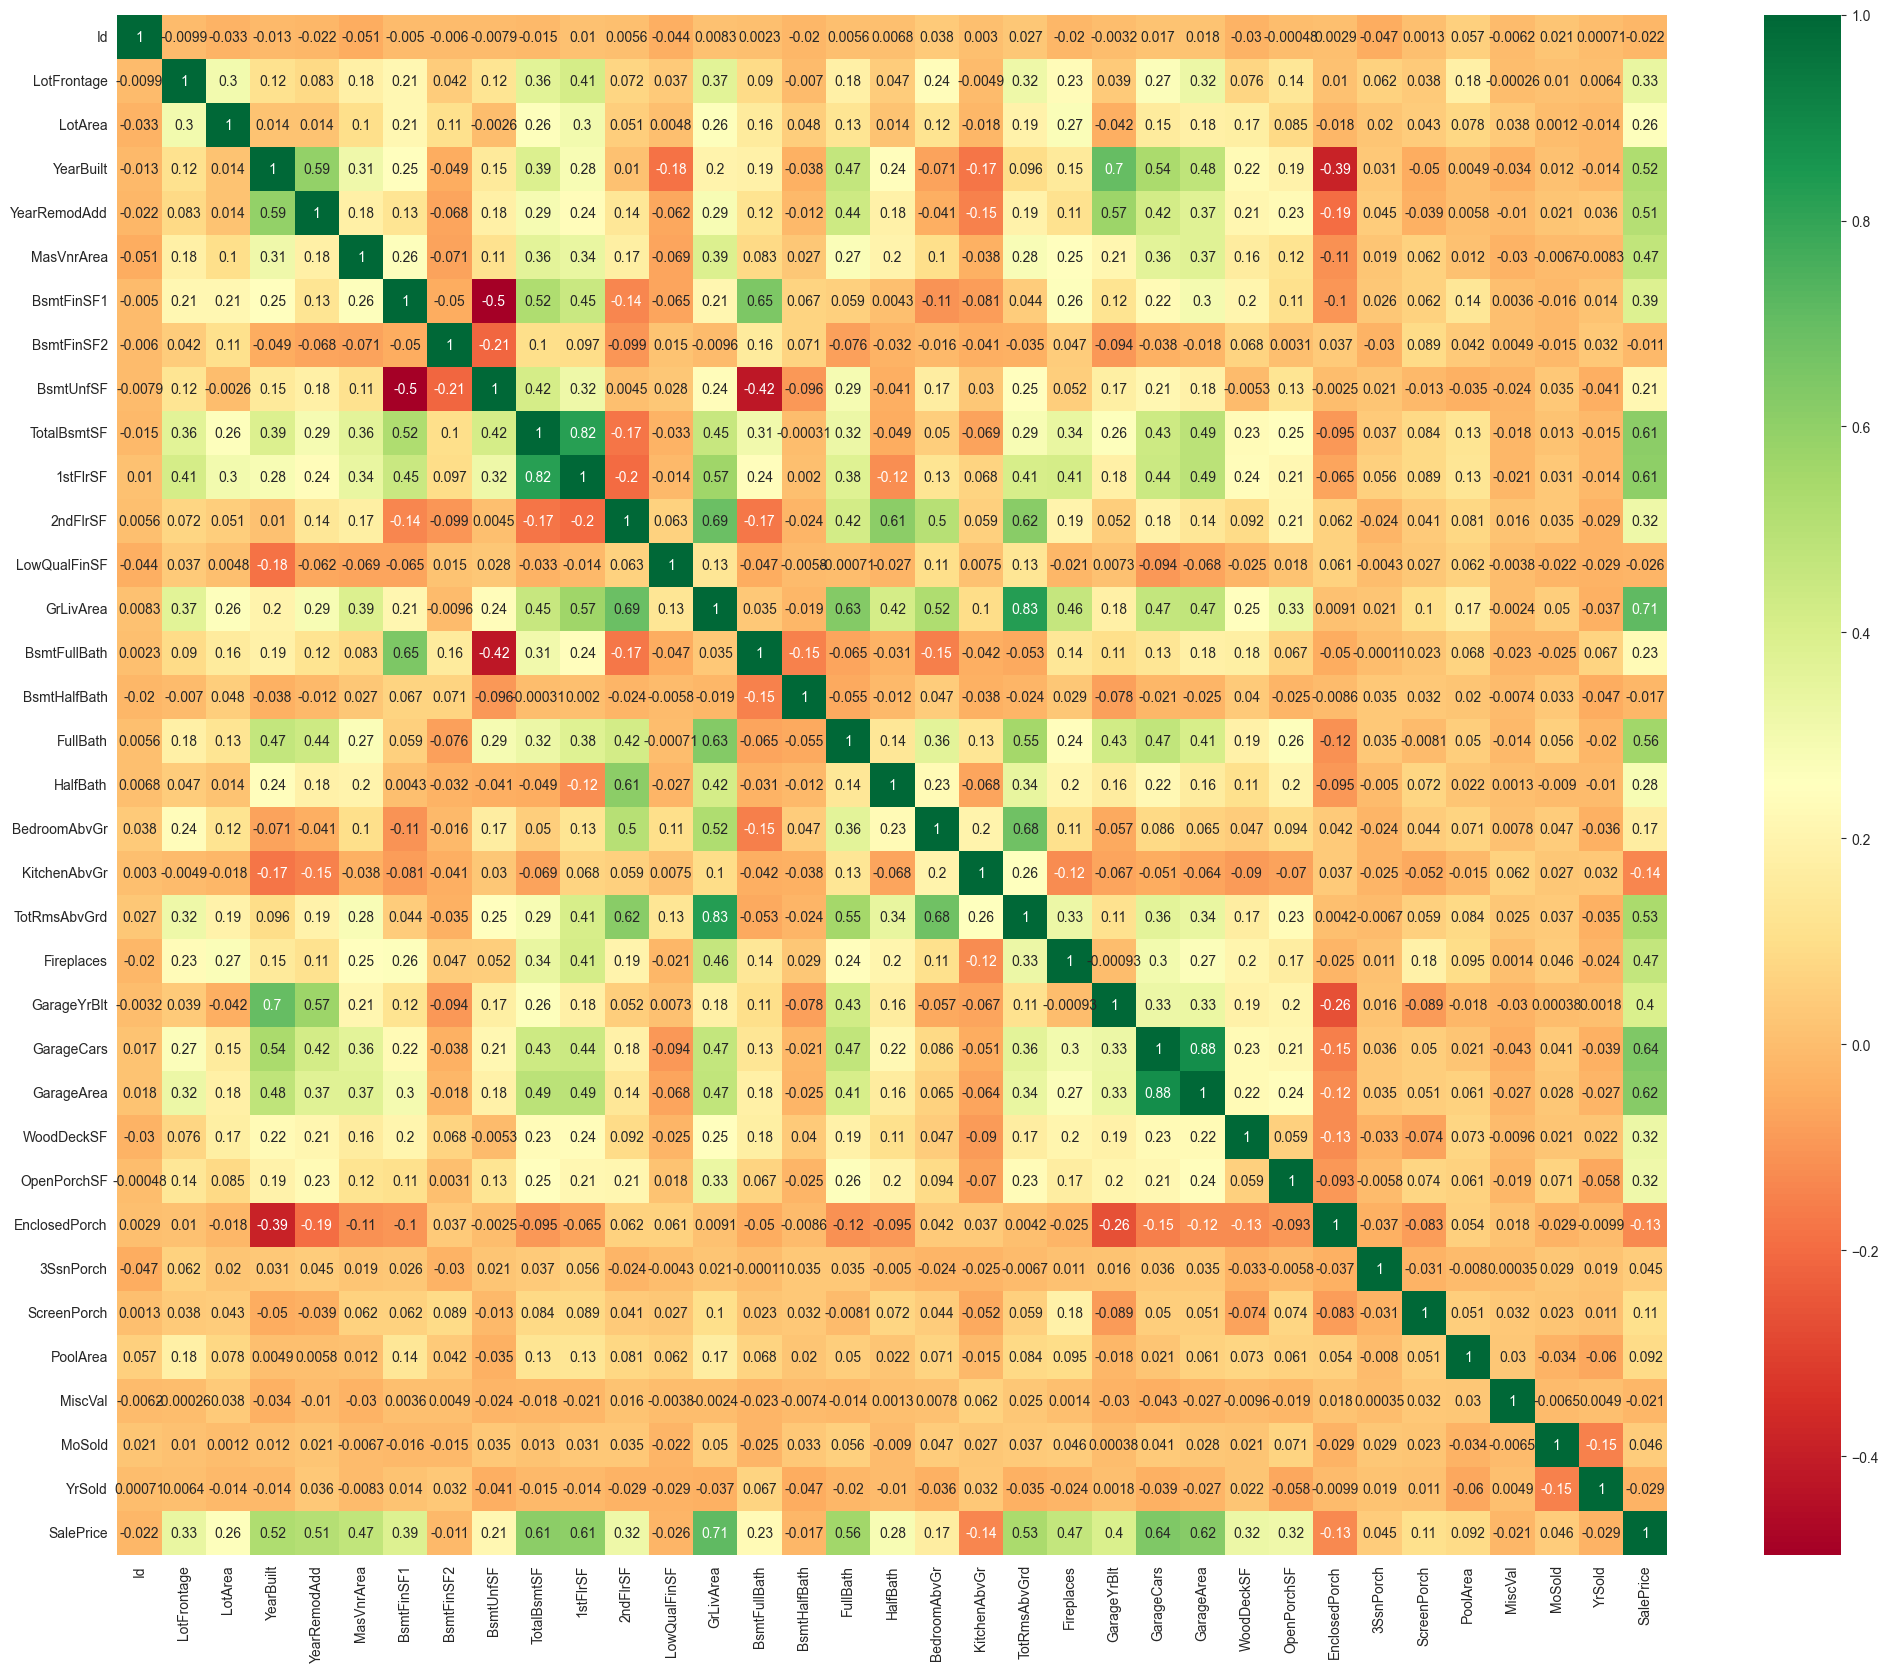

In [28]:
# Plot heatmap to detect correlations among numerical variables
plt.figure(figsize=(25,20))
sns.heatmap(df_num.corr(), annot=True, cmap='RdYlGn');
## ANALYSIS : GrLivArea,GarageCars,GarageArea,TotalBsmtSF, 1stFlrSF are highly correlated to Saleprice

In [29]:
#Categorical columns
df_cat = df.select_dtypes(include='object')

In [30]:
df.shape

(1460, 75)

In [31]:
df.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1         60       RL         65.0     8450   Pave      Reg         Lvl   
1   2         20       RL         80.0     9600   Pave      Reg         Lvl   
2   3         60       RL         68.0    11250   Pave      IR1         Lvl   
3   4         70       RL         60.0     9550   Pave      IR1         Lvl   
4   5         60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold YrSold SaleType  SaleCondition  SalePrice  
0       0      2   2008       WD         Normal     208500  
1       0      5   2007       WD         Normal     181500  
2       0      9   2008       WD         Normal     223500  
3       0      2   2006       WD        Abnorml     140000  
4       0     12   2008       WD         Normal     250000  

[5 rows x 75 columns]

In [32]:
# Convert categorical value into Dummy variable
df_cat_dummies = pd.get_dummies(df_cat, drop_first=True)

In [33]:
## Concatenate the outlier treated numerical columns with one hot encoded categorical columns
df = pd.concat([df_num, df_cat_dummies], axis=1)


## View the first few rows of our dataframe
df.head()

Id  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450       2003          2003       196.0         706   
1   2         80.0     9600       1976          1976         0.0         978   
2   3         68.0    11250       2001          2002       162.0         486   
3   4         60.0     9550       1915          1970         0.0         216   
4   5         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  SaleType_ConLI  SaleType_ConLw  \
0           0        150          856  ...           False           False   
1           0        284         1262  ...           False           False   
2           0        434          920  ...           False           False   
3           0        540          756  ...           False           False   
4           0        490         1145  ...           False           False   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  \
0         False         False         True                  False   
1         False         False         True                  False   
2         False         False         True                  False   
3         False         False         True                  False   
4         False         False         True                  False   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                 False                 False                  True   
1                 False                 False                  True   
2                 False                 False                  True   
3                 False                 False                 False   
4                 False                 False                  True   

   SaleCondition_Partial  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False  

[5 rows x 259 columns]

## Splitting the data into train and test sets

In [34]:
## X contains all independent variables use to make predictions except 'Id' (not useful) and 'SalePrice' (target variable)
X = df.drop(["Id", "SalePrice"], axis=1)
X.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0     8450       2003          2003       196.0         706   
1         80.0     9600       1976          1976         0.0         978   
2         68.0    11250       2001          2002       162.0         486   
3         60.0     9550       1915          1970         0.0         216   
4         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
0           0        150          856       856  ...           False   
1           0        284         1262      1262  ...           False   
2           0        434          920       920  ...           False   
3           0        540          756       961  ...           False   
4           0        490         1145      1145  ...           False   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0           False         False         False         True   
1           False         False         False         True   
2           False         False         False         True   
3           False         False         False         True   
4           False         False         False         True   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                  False                 False                 False   
1                  False                 False                 False   
2                  False                 False                 False   
3                  False                 False                 False   
4                  False                 False                 False   

   SaleCondition_Normal  SaleCondition_Partial  
0                  True                  False  
1                  True                  False  
2                  True                  False  
3                 False                  False  
4                  True                  False  

[5 rows x 257 columns]

In [35]:
## Separate out the target variable as y which we want to predict
y = df["SalePrice"].copy()
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [36]:
#import train_test_split to split the data
from sklearn.model_selection import train_test_split

In [37]:
## Splitting X and y into 70% train data and 30% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

X_train.shape

(1021, 257)

In [38]:
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (1021, 257)
X_test shape (438, 257)
y_train shape (1021,)
y_test shape (438,)


## Scaling of numeric variables

In [39]:
## Create a list of numerical columns to be scaled
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [40]:
X_train.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
210          67.0     5604       1925          1950         0.0         468   
318          90.0     9900       1993          1993       256.0         987   
239          52.0     8741       1945          1950         0.0          94   
986          59.0     5310       1910          2003         0.0           0   
1416         60.0    11340       1885          1950         0.0           0   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
210            0        396          864       864  ...           False   
318            0        360         1347      1372  ...           False   
239            0        641          735       798  ...           False   
986            0        485          485      1001  ...           False   
1416           0        777          777      1246  ...           False   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
210            False         False         False         True   
318            False         False         False         True   
239            False         False         False         True   
986            False         False         False         True   
1416           False         False         False         True   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
210                   False                 False                 False   
318                   False                 False                 False   
239                   False                 False                 False   
986                   False                 False                 False   
1416                  False                 False                 False   

      SaleCondition_Normal  SaleCondition_Partial  
210                   True                  False  
318                   True                  False  
239                   True                  False  
986                   True                  False  
1416                  True                  False  

[5 rows x 257 columns]

In [41]:
#Scaling using MinMax
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#scaler = StandardScaler()
scaler=MinMaxScaler()

In [42]:
X_train.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
210          67.0     5604       1925          1950         0.0         468   
318          90.0     9900       1993          1993       256.0         987   
239          52.0     8741       1945          1950         0.0          94   
986          59.0     5310       1910          2003         0.0           0   
1416         60.0    11340       1885          1950         0.0           0   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
210            0        396          864       864  ...           False   
318            0        360         1347      1372  ...           False   
239            0        641          735       798  ...           False   
986            0        485          485      1001  ...           False   
1416           0        777          777      1246  ...           False   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
210            False         False         False         True   
318            False         False         False         True   
239            False         False         False         True   
986            False         False         False         True   
1416           False         False         False         True   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
210                   False                 False                 False   
318                   False                 False                 False   
239                   False                 False                 False   
986                   False                 False                 False   
1416                  False                 False                 False   

      SaleCondition_Normal  SaleCondition_Partial  
210                   True                  False  
318                   True                  False  
239                   True                  False  
986                   True                  False  
1416                  True                  False  

[5 rows x 257 columns]

In [43]:
## Scale the numerical columns 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [44]:
X_train.head()

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
210      0.157534  0.019306   0.384058      0.000000        0.00    0.082920   
318      0.236301  0.039403   0.876812      0.716667        0.16    0.174876   
239      0.106164  0.033981   0.528986      0.000000        0.00    0.016655   
986      0.130137  0.017931   0.275362      0.883333        0.00    0.000000   
1416     0.133562  0.046139   0.094203      0.000000        0.00    0.000000   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
210          0.0   0.169521     0.141408  0.113889  ...           False   
318          0.0   0.154110     0.220458  0.231481  ...           False   
239          0.0   0.274401     0.120295  0.098611  ...           False   
986          0.0   0.207620     0.079378  0.145602  ...           False   
1416         0.0   0.332620     0.127169  0.202315  ...           False   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
210            False         False         False         True   
318            False         False         False         True   
239            False         False         False         True   
986            False         False         False         True   
1416           False         False         False         True   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
210                   False                 False                 False   
318                   False                 False                 False   
239                   False                 False                 False   
986                   False                 False                 False   
1416                  False                 False                 False   

      SaleCondition_Normal  SaleCondition_Partial  
210                   True                  False  
318                   True                  False  
239                   True                  False  
986                   True                  False  
1416                  True                  False  

[5 rows x 257 columns]

In [45]:
X_test.head()

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
1436     0.133562  0.035192   0.717391      0.350000     0.00000    0.109142   
57       0.232877  0.047566   0.956522      0.900000     0.00000    0.000000   
780      0.143836  0.029930   0.891304      0.766667     0.02375    0.000000   
382      0.198630  0.036338   0.971014      0.933333     0.00000    0.000000   
1170     0.188356  0.039309   0.760870      0.450000     0.00000    0.092488   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
1436         0.0   0.106164     0.141408  0.113889  ...           False   
57           0.0   0.368151     0.140753  0.112963  ...           False   
780          0.0   0.529538     0.202455  0.203935  ...           False   
382          0.0   0.401969     0.153682  0.131250  ...           False   
1170         0.0   0.245719     0.179378  0.172685  ...           False   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
1436           False         False         False         True   
57             False         False         False         True   
780            False         False         False         True   
382            False         False         False         True   
1170           False         False         False         True   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
1436                  False                 False                 False   
57                    False                 False                 False   
780                   False                 False                 False   
382                   False                 False                 False   
1170                  False                 False                 False   

      SaleCondition_Normal  SaleCondition_Partial  
1436                  True                  False  
57                    True                  False  
780                   True                  False  
382                   True                  False  
1170                  True                  False  

[5 rows x 257 columns]

In [46]:
#r2score,RSS and RMSE
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9560764685872699
-4.931206413350541e+20
280262824154.0
1.3899653307055028e+33
274498358.6229187
3.173436828094755e+30


## Model Building and Evaluation

## Model 1: Ridge Regression

In [47]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [48]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

In [49]:
# cross validation
ridge = Ridge()
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [50]:
print(ridge_model_cv.best_params_)

{'alpha': 8.0}


In [51]:
alpha = 8
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.11665499e+02  1.41715332e+04  7.67708743e+03  1.15778025e+04
  1.86043066e+04  9.41798827e+03  7.05547440e+03  1.41360087e+04
  1.58063194e+04  3.12435664e+04  4.50232493e+04 -2.98460171e+03
  4.35065616e+04  1.69974119e+04  1.25230380e+03  3.14818894e+04
  1.02003758e+04  7.62622182e+03 -9.88698177e+03  2.73619332e+04
  2.10178898e+04 -7.41582345e+02  2.80844083e+04  1.58738334e+04
  1.24280165e+04  2.38878524e+03  2.59134319e+03  8.97743265e+03
  6.53201968e+03  2.31968072e+03  3.18748857e+02 -2.01623518e+03
 -3.64750436e+03 -6.96592815e+03  1.21481875e+03  1.59709024e+03
  2.52708812e+03 -1.82023192e+03  5.01067755e+03  3.37200464e+03
 -2.21429219e+03 -2.07661795e+03 -3.89395816e+03 -1.00712823e+04
 -7.97976908e+03 -5.01639897e+03 -5.69954494e+03  6.21923898e+03
  5.91890226e+03  7.53798150e+03  3.15105407e+03  1.32450690e+03
  4.58123039e+03 -7.50767051e+03 -4.23906827e+02  8.67696443e+03
  9.96347255e+03  1.27914357e+04 -3.39923788e+03  9.98117200e+03
 -1.02269380e+04 -2.16394

In [52]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [53]:
metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8923725115954012
0.8677785290735953
686738586053.9556
372694316881.60724
672613698.3878115
850900266.8529845


## Model 2: Lasso Regression

In [54]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [55]:
print(lasso_model_cv.best_params_)

{'alpha': 20}


In [56]:
alpha =20

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=20)

In [57]:
lasso.coef_

array([ 0.00000000e+00,  8.17428210e+04,  4.05578006e+04,  7.55565814e+03,
        1.61042784e+04,  3.13777539e+04,  9.92748743e+03, -0.00000000e+00,
        5.37421390e+04,  0.00000000e+00,  3.47435107e+04, -1.58725728e+04,
        2.78397137e+05,  1.64109438e+04,  6.46335476e+02,  1.30757104e+04,
       -1.32964346e+03, -9.39080574e+03, -2.93625858e+04, -0.00000000e+00,
        9.10956906e+03,  1.83515160e+03,  2.88421256e+04, -0.00000000e+00,
        3.76437476e+03,  6.20773142e+03,  2.12509401e+03,  1.85626790e+04,
        7.90356647e+03,  0.00000000e+00,  0.00000000e+00, -2.27946326e+03,
       -1.05878965e+03, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.67104766e+03, -1.11226714e+03,  1.84736818e+03, -2.60868270e+03,
        0.00000000e+00, -0.00000000e+00, -5.66536347e+03, -2.71541840e+03,
       -7.26681295e+02, -0.00000000e+00, -6.80109116e+03,  1.30783038e+04,
        1.79788258e+04,  1.80399355e+04,  1.43813581e+04,  5.88605963e+03,
        2.13371816e+03, -

In [58]:

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9434261467551299
0.8491066701692436
360980717481.3345
425324919540.2368
353556040.6281435
971061460.137527


In [59]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.560765e-01      8.923725e-01      9.434261e-01
1   R2 Score (Test)      -4.931206e+20      8.677785e-01      8.491067e-01
2       RSS (Train)       2.802628e+11      6.867386e+11      3.609807e+11
3        RSS (Test)       1.389965e+33      3.726943e+11      4.253249e+11
4       MSE (Train)       1.656799e+04      2.593480e+04      1.880309e+04
5        MSE (Test)       1.781414e+15      2.917019e+04      3.116186e+04

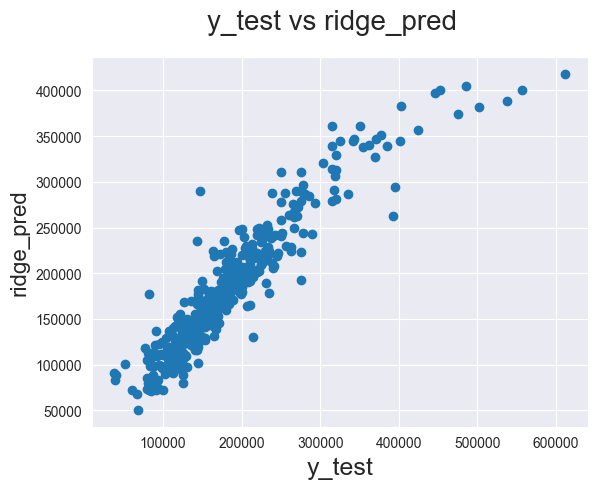

In [60]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
ridge_pred = ridge.predict(X_test)
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

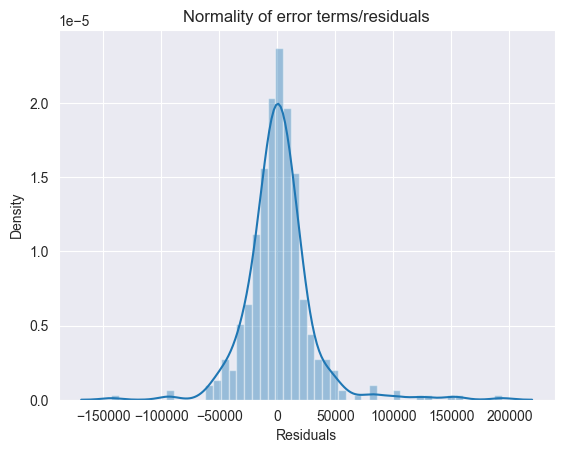

In [61]:
y_res=y_test-ridge_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

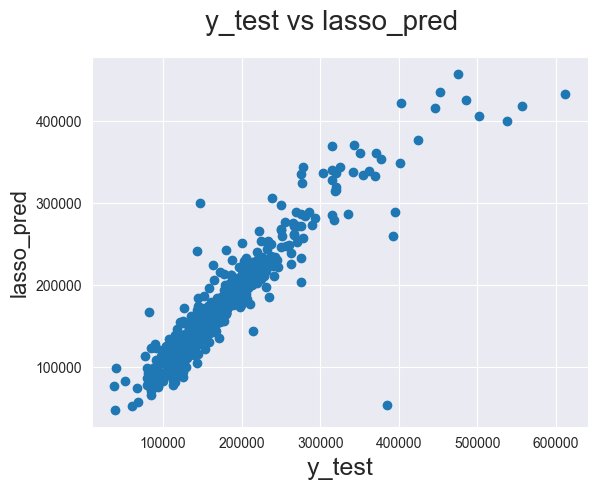

In [62]:
lasso_pred = lasso.predict(X_test)
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

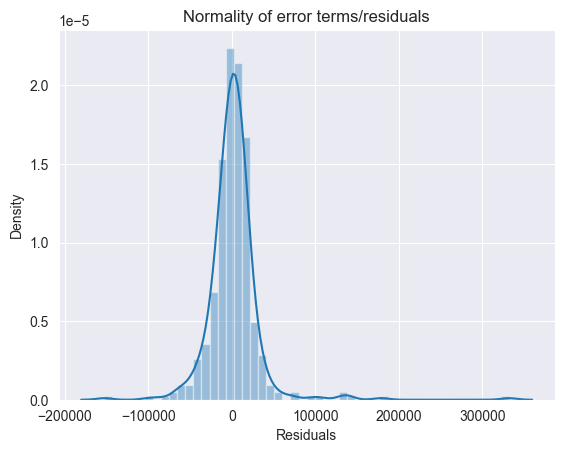

In [63]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

## Lets observe the changes in the coefficients after regularization

In [64]:
betas = pd.DataFrame(index=X_train.columns)

In [65]:
betas.rows = X_train.columns

In [66]:
betas['Linear'] = lr.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [67]:
pd.set_option('display.max_rows', None)
betas.head(68)

Linear         Ridge          Lasso
LotFrontage           2.709822e+04   -111.665499       0.000000
LotArea               1.436227e+05  14171.533178   81742.820962
YearBuilt             6.145347e+04   7677.087431   40557.800595
YearRemodAdd          5.994810e+03  11577.802473    7555.658141
MasVnrArea            2.147861e+04  18604.306572   16104.278423
BsmtFinSF1            8.058291e+16   9417.988267   31377.753941
BsmtFinSF2            2.104522e+16   7055.474396    9927.487428
BsmtUnfSF             3.335253e+16  14136.008678      -0.000000
TotalBsmtSF          -8.723629e+16  15806.319364   53742.139026
1stFlrSF             -1.545707e+16  31243.566389       0.000000
2ndFlrSF             -7.388621e+15  45023.249344   34743.510671
LowQualFinSF         -1.842683e+15  -2984.601709  -15872.572765
GrLivArea             1.862004e+16  43506.561648  278397.136830
BsmtFullBath          4.481670e+03  16997.411930   16410.943794
BsmtHalfBath         -1.251687e+03   1252.303801     646.335476
FullBath              6.504264e+03  31481.889404   13075.710445
HalfBath             -6.697336e+03  10200.375831   -1329.643465
BedroomAbvGr         -1.739456e+04   7626.221823   -9390.805742
KitchenAbvGr         -3.278977e+04  -9886.981771  -29362.585756
TotRmsAbvGrd         -6.640662e+03  27361.933160      -0.000000
Fireplaces            4.909107e+03  21017.889807    9109.569062
GarageYrBlt           7.178986e+03   -741.582345    1835.151603
GarageCars            1.394776e+04  28084.408342   28842.125634
GarageArea            1.221500e+04  15873.833405      -0.000000
WoodDeckSF            3.649626e+03  12428.016521    3764.374763
OpenPorchSF           1.477131e+04   2388.785244    6207.731417
EnclosedPorch         5.085002e+03   2591.343191    2125.094010
3SsnPorch             2.229914e+04   8977.432654   18562.679048
ScreenPorch           9.038611e+03   6532.019675    7903.566466
PoolArea              5.654187e+04   2319.680717       0.000000
MiscVal               1.860248e+04    318.748857       0.000000
MoSold               -3.178938e+03  -2016.235176   -2279.463258
YrSold               -6.935490e+02  -3647.504362   -1058.789648
MSSubClass_30         2.643750e+03  -6965.928149      -0.000000
MSSubClass_40         7.796812e+03   1214.818746       0.000000
MSSubClass_45        -1.070650e+04   1597.090237       0.000000
MSSubClass_50        -4.275500e+03   2527.088117    1671.047660
MSSubClass_60         3.452000e+03  -1820.231923   -1112.267139
MSSubClass_70         4.760000e+03   5010.677552    1847.368177
MSSubClass_75        -3.600700e+04   3372.004640   -2608.682703
MSSubClass_80        -3.569000e+03  -2214.292188       0.000000
MSSubClass_85        -9.976500e+03  -2076.617954      -0.000000
MSSubClass_90        -4.021867e+16  -3893.958162   -5665.363473
MSSubClass_120       -9.940000e+02 -10071.282262   -2715.418397
MSSubClass_160       -2.294000e+03  -7979.769077    -726.681295
MSSubClass_180       -2.323000e+03  -5016.398967      -0.000000
MSSubClass_190       -6.588351e+15  -5699.544941   -6801.091161
MSZoning_FV           3.813600e+04   6219.238976   13078.303804
MSZoning_RH           4.245725e+04   5918.902258   17978.825809
MSZoning_RL           4.274000e+04   7537.981504   18039.935455
MSZoning_RM           3.734400e+04   3151.054069   14381.358115
Street_Pave           2.547075e+04   1324.506899    5886.059635
LotShape_IR2          1.754000e+03   4581.230392    2133.718158
LotShape_IR3          3.498000e+03  -7507.670514   -4548.425838
LotShape_Reg          6.480000e+02   -423.906827     197.817845
LandContour_HLS      -4.460000e+02   8676.964431    3597.718282
LandContour_Low      -4.103000e+03   9963.472555    4339.587521
LandContour_Lvl       3.784000e+03  12791.435704    7847.577798
Utilities_NoSeWa     -1.159162e+04  -3399.237882      -0.000000
LotConfig_CulDSac     7.444000e+03   9981.171997    8680.965032
LotConfig_FR2        -6.276000e+03 -10226.937969   -8488.256379
LotConfig_FR3         1.150988e+04  -2163.942154       0.000

In [68]:
betas['Ridge'].sort_values(ascending=False)[:10]

2ndFlrSF                45023.249344
OverallQual_10          43709.468561
GrLivArea               43506.561648
Neighborhood_NoRidge    40526.534318
OverallQual_9           33044.958071
RoofMatl_WdShngl        32311.913546
FullBath                31481.889404
1stFlrSF                31243.566389
GarageCars              28084.408342
TotRmsAbvGrd            27361.933160
Name: Ridge, dtype: float64

In [69]:
## View the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

RoofMatl_WdShngl    423217.649289
RoofMatl_CompShg    362268.297903
RoofMatl_Membran    355708.053860
RoofMatl_WdShake    347420.210343
RoofMatl_Roll       345905.667157
RoofMatl_Tar&Grv    343212.890658
RoofMatl_Metal      333553.090102
GrLivArea           278397.136830
OverallQual_10      104109.685626
LotArea              81742.820962
Name: Lasso, dtype: float64

## Which variables are significant in predicting the price of a house

RoofMatl
GrLivArea          
LotArea
OverallQual
2ndFlrSF              
FullBath
1stFlrSF
GarageCars
TotRmsAbvGrd

## How well those variables describe the price of a house.

In [70]:
final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.560765e-01      8.923725e-01      9.434261e-01
1   R2 Score (Test)      -4.931206e+20      8.677785e-01      8.491067e-01
2       RSS (Train)       2.802628e+11      6.867386e+11      3.609807e+11
3        RSS (Test)       1.389965e+33      3.726943e+11      4.253249e+11
4       MSE (Train)       1.656799e+04      2.593480e+04      1.880309e+04
5        MSE (Test)       1.781414e+15      2.917019e+04      3.116186e+04

In [71]:
pd.set_option('display.max_rows', None)
betas.head(68)

Linear         Ridge          Lasso
LotFrontage           2.709822e+04   -111.665499       0.000000
LotArea               1.436227e+05  14171.533178   81742.820962
YearBuilt             6.145347e+04   7677.087431   40557.800595
YearRemodAdd          5.994810e+03  11577.802473    7555.658141
MasVnrArea            2.147861e+04  18604.306572   16104.278423
BsmtFinSF1            8.058291e+16   9417.988267   31377.753941
BsmtFinSF2            2.104522e+16   7055.474396    9927.487428
BsmtUnfSF             3.335253e+16  14136.008678      -0.000000
TotalBsmtSF          -8.723629e+16  15806.319364   53742.139026
1stFlrSF             -1.545707e+16  31243.566389       0.000000
2ndFlrSF             -7.388621e+15  45023.249344   34743.510671
LowQualFinSF         -1.842683e+15  -2984.601709  -15872.572765
GrLivArea             1.862004e+16  43506.561648  278397.136830
BsmtFullBath          4.481670e+03  16997.411930   16410.943794
BsmtHalfBath         -1.251687e+03   1252.303801     646.335476
FullBath              6.504264e+03  31481.889404   13075.710445
HalfBath             -6.697336e+03  10200.375831   -1329.643465
BedroomAbvGr         -1.739456e+04   7626.221823   -9390.805742
KitchenAbvGr         -3.278977e+04  -9886.981771  -29362.585756
TotRmsAbvGrd         -6.640662e+03  27361.933160      -0.000000
Fireplaces            4.909107e+03  21017.889807    9109.569062
GarageYrBlt           7.178986e+03   -741.582345    1835.151603
GarageCars            1.394776e+04  28084.408342   28842.125634
GarageArea            1.221500e+04  15873.833405      -0.000000
WoodDeckSF            3.649626e+03  12428.016521    3764.374763
OpenPorchSF           1.477131e+04   2388.785244    6207.731417
EnclosedPorch         5.085002e+03   2591.343191    2125.094010
3SsnPorch             2.229914e+04   8977.432654   18562.679048
ScreenPorch           9.038611e+03   6532.019675    7903.566466
PoolArea              5.654187e+04   2319.680717       0.000000
MiscVal               1.860248e+04    318.748857       0.000000
MoSold               -3.178938e+03  -2016.235176   -2279.463258
YrSold               -6.935490e+02  -3647.504362   -1058.789648
MSSubClass_30         2.643750e+03  -6965.928149      -0.000000
MSSubClass_40         7.796812e+03   1214.818746       0.000000
MSSubClass_45        -1.070650e+04   1597.090237       0.000000
MSSubClass_50        -4.275500e+03   2527.088117    1671.047660
MSSubClass_60         3.452000e+03  -1820.231923   -1112.267139
MSSubClass_70         4.760000e+03   5010.677552    1847.368177
MSSubClass_75        -3.600700e+04   3372.004640   -2608.682703
MSSubClass_80        -3.569000e+03  -2214.292188       0.000000
MSSubClass_85        -9.976500e+03  -2076.617954      -0.000000
MSSubClass_90        -4.021867e+16  -3893.958162   -5665.363473
MSSubClass_120       -9.940000e+02 -10071.282262   -2715.418397
MSSubClass_160       -2.294000e+03  -7979.769077    -726.681295
MSSubClass_180       -2.323000e+03  -5016.398967      -0.000000
MSSubClass_190       -6.588351e+15  -5699.544941   -6801.091161
MSZoning_FV           3.813600e+04   6219.238976   13078.303804
MSZoning_RH           4.245725e+04   5918.902258   17978.825809
MSZoning_RL           4.274000e+04   7537.981504   18039.935455
MSZoning_RM           3.734400e+04   3151.054069   14381.358115
Street_Pave           2.547075e+04   1324.506899    5886.059635
LotShape_IR2          1.754000e+03   4581.230392    2133.718158
LotShape_IR3          3.498000e+03  -7507.670514   -4548.425838
LotShape_Reg          6.480000e+02   -423.906827     197.817845
LandContour_HLS      -4.460000e+02   8676.964431    3597.718282
LandContour_Low      -4.103000e+03   9963.472555    4339.587521
LandContour_Lvl       3.784000e+03  12791.435704    7847.577798
Utilities_NoSeWa     -1.159162e+04  -3399.237882      -0.000000
LotConfig_CulDSac     7.444000e+03   9981.171997    8680.965032
LotConfig_FR2        -6.276000e+03 -10226.937969   -8488.256379
LotConfig_FR3         1.150988e+04  -2163.942154       0.000

### Problem Statement II

In [72]:
#Change the alpha value from 8 to 16
alpha = 16
ridge2 = Ridge(alpha=alpha)
ridge2.fit(X_train, y_train)

Ridge(alpha=16)

In [73]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge2.predict(X_train)
y_pred_test = ridge2.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)


0.8781935563542763
0.8592127036023505
777210228738.8402
396838916470.1991
761224513.9459747
906024923.4479431


In [74]:
#Changed alpha 20 to 40
alpha =40
lasso40 = Lasso(alpha=alpha)
lasso40.fit(X_train, y_train)

Lasso(alpha=40)

In [75]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso40.predict(X_train)
y_pred_test = lasso40.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)


0.9194949064890852
0.8513990586155149
513678753516.8836
418863335502.3016
503113372.6903855
956308985.1650721


In [76]:
#important predictor variables
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge16'] = ridge2.coef_
betas['Ridge8'] = ridge.coef_
betas['Lasso20'] = lasso.coef_
betas['Lasso40'] = lasso40.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

Ridge16        Ridge8        Lasso20        Lasso40
LotFrontage            2956.058937   -111.665499       0.000000   -8498.527931
LotArea                9609.112138  14171.533178   81742.820962   46818.180672
YearBuilt              5977.729694   7677.087431   40557.800595   25962.113569
YearRemodAdd          12401.527962  11577.802473    7555.658141    7900.351739
MasVnrArea            17564.901511  18604.306572   16104.278423   12488.912137
BsmtFinSF1             8723.951434   9417.988267   31377.753941       0.000000
BsmtFinSF2             4821.965936   7055.474396    9927.487428    4833.095947
BsmtUnfSF             13982.469368  14136.008678      -0.000000    3375.305912
TotalBsmtSF           14567.693638  15806.319364   53742.139026       0.000000
1stFlrSF              25116.727664  31243.566389       0.000000       0.000000
2ndFlrSF              33206.993721  45023.249344   34743.510671   39472.332179
LowQualFinSF          -2226.311419  -2984.601709  -15872.572765  -10580.666199
GrLivArea             33806.716980  43506.561648  278397.136830  243390.729792
BsmtFullBath          13437.406192  16997.411930   16410.943794   21362.610510
BsmtHalfBath            606.239476   1252.303801     646.335476     172.943573
FullBath              28043.867049  31481.889404   13075.710445   19990.830305
HalfBath              10639.015460  10200.375831   -1329.643465       0.000000
BedroomAbvGr           8310.279814   7626.221823   -9390.805742      -0.000000
KitchenAbvGr          -6197.756395  -9886.981771  -29362.585756  -29773.781248
TotRmsAbvGrd          26060.038636  27361.933160      -0.000000       0.000000
Fireplaces            22881.603542  21017.889807    9109.569062   11773.085244
GarageYrBlt            -404.372786   -741.582345    1835.151603       0.000000
GarageCars            25822.850786  28084.408342   28842.125634   35924.595265
GarageArea            18218.419890  15873.833405      -0.000000      -0.000000
WoodDeckSF            11885.267601  12428.016521    3764.374763    3686.038785
OpenPorchSF            3810.889523   2388.785244    6207.731417     676.224782
EnclosedPorch          1776.096691   2591.343191    2125.094010     590.245135
3SsnPorch              5311.229217   8977.432654   18562.679048   15731.145383
ScreenPorch            5310.258904   6532.019675    7903.566466    7960.481903
PoolArea               2530.894757   2319.680717       0.000000   -7455.908427
MiscVal                -182.375775    318.748857       0.000000      -0.000000
MoSold                -1957.662493  -2016.235176   -2279.463258   -1351.384030
YrSold                -3785.623481  -3647.504362   -1058.789648   -1859.370996
MSSubClass_30         -7900.020158  -6965.928149      -0.000000    -524.413664
MSSubClass_40           788.550485   1214.818746       0.000000       0.000000
MSSubClass_45          1076.625130   1597.090237       0.000000       0.000000
MSSubClass_50          3287.719399   2527.088117    1671.047660    3406.324020
MSSubClass_60           609.606234  -1820.231923   -1112.267139   -5565.964662
MSSubClass_70          5320.383577   5010.677552    1847.368177       0.000000
MSSubClass_75          3281.541052   3372.004640   -2608.682703      -0.000000
MSSubClass_80         -2865.997820  -2214.292188       0.000000      -0.000000
MSSubClass_85         -2257.210889  -2076.617954      -0.000000       0.000000
MSSubClass_90         -3114.261087  -3893.958162   -5665.363473   -2040.739222
MSSubClass_120        -9338.843521 -10071.282262   -2715.418397   -1831.883866
MSSubClass_160        -7022.998113  -7979.769077    -726.681295   -1494.435748
MSSubClass_180        -4024.732282  -5016.398967      -0.000000      -0.000000
MSSubClass_190        -4683.467685  -5699.544941   -6801.091161   -6715.786524
MSZoning_FV            4296.111137   6219.238976   13078.303804       0.000000
MSZoning_RH            3470.818397   5918.902258   17978.825809    3835.601742
MSZoning_RL            6332.683322   7537.981504   18039.935455    5191.19154

In [77]:
betas['Ridge2'] = ridge2.coef_
betas['Lasso40'] = lasso40.coef_

In [78]:
## View the top 10 coefficients of Ridge in descending order
betas['Ridge2'].sort_values(ascending=False)[:10]

Neighborhood_NoRidge    35225.208601
OverallQual_10          34251.021203
GrLivArea               33806.716980
2ndFlrSF                33206.993721
OverallQual_9           28073.401057
FullBath                28043.867049
TotRmsAbvGrd            26060.038636
GarageCars              25822.850786
1stFlrSF                25116.727664
Fireplaces              22881.603542
Name: Ridge2, dtype: float64

In [79]:
## View the top 10 coefficients of Lasso in descending order
betas['Lasso40'].sort_values(ascending=False)[:10]

GrLivArea               243390.729792
RoofMatl_WdShngl        129605.759375
OverallQual_10           96397.321428
RoofMatl_CompShg         63708.769520
OverallQual_9            63658.822700
LotArea                  46818.180672
RoofMatl_WdShake         41485.110754
2ndFlrSF                 39472.332179
Neighborhood_NoRidge     38919.035846
GarageCars               35924.595265
Name: Lasso40, dtype: float64

In [80]:
## Question3

In [81]:
## Create a list of top 5 lasso predictors that are to be removed
previous_predictors = ['RoofMatl_WdShngl', 'GrLivArea', 'OverallQual_10', 'LotArea', '2ndFlrSF']

In [82]:
## drop these from train and test data
X_train_drop = X_train.drop(previous_predictors, axis=1)
X_test_drop = X_test.drop(previous_predictors, axis=1)

In [83]:
## rerunning lasso on new data set

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train_drop, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [84]:
print(lasso_model_cv.best_params_)

{'alpha': 100}


In [85]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_drop, y_train)

Lasso(alpha=100)

In [86]:
lasso.coef_

array([ 0.00000000e+00,  0.00000000e+00,  1.19735459e+04,  2.31776888e+04,
        0.00000000e+00,  0.00000000e+00,  4.72327104e+03,  0.00000000e+00,
        1.36676541e+05, -0.00000000e+00,  1.67826135e+04,  0.00000000e+00,
        5.29558618e+04,  1.95698612e+04,  0.00000000e+00, -2.83111126e+04,
        4.48431562e+04,  1.53792213e+04, -0.00000000e+00,  3.96045295e+04,
        0.00000000e+00,  1.25899888e+04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  5.39518994e+02,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -2.28621452e+03, -5.94143291e+03,  0.00000000e+00,
       -0.00000000e+00,  5.18522126e+03,  2.92367913e+03,  7.43733633e+00,
        4.06180949e+03, -0.00000000e+00, -0.00000000e+00, -9.61470628e+03,
       -9.44521849e+02, -9.06268056e+02, -0.00000000e+00, -1.17305887e+03,
        0.00000000e+00,  5.20770212e+02,  1.11824732e+03, -0.00000000e+00,
        0.00000000e+00,  1.56263334e+03, -6.30128919e+03, -0.00000000e+00,
        2.24787806e+03,  

In [87]:
betas = pd.DataFrame(index=X_train_drop.columns)

In [88]:
betas.rows = X_train_drop.columns

In [89]:
betas['Lasso'] = lasso.coef_

In [90]:
pd.set_option('display.max_rows', None)
betas.head(68)

Lasso
LotFrontage                0.000000
YearBuilt                  0.000000
YearRemodAdd           11973.545901
MasVnrArea             23177.688762
BsmtFinSF1                 0.000000
BsmtFinSF2                 0.000000
BsmtUnfSF               4723.271038
TotalBsmtSF                0.000000
1stFlrSF              136676.540936
LowQualFinSF              -0.000000
BsmtFullBath           16782.613492
BsmtHalfBath               0.000000
FullBath               52955.861826
HalfBath               19569.861159
BedroomAbvGr               0.000000
KitchenAbvGr          -28311.112557
TotRmsAbvGrd           44843.156182
Fireplaces             15379.221299
GarageYrBlt               -0.000000
GarageCars             39604.529504
GarageArea                 0.000000
WoodDeckSF             12589.988810
OpenPorchSF                0.000000
EnclosedPorch              0.000000
3SsnPorch                  0.000000
ScreenPorch              539.518994
PoolArea                   0.000000
MiscVal                    0.000000
MoSold                    -0.000000
YrSold                 -2286.214520
MSSubClass_30          -5941.432909
MSSubClass_40              0.000000
MSSubClass_45             -0.000000
MSSubClass_50           5185.221258
MSSubClass_60           2923.679132
MSSubClass_70              7.437336
MSSubClass_75           4061.809486
MSSubClass_80             -0.000000
MSSubClass_85             -0.000000
MSSubClass_90          -9614.706283
MSSubClass_120          -944.521849
MSSubClass_160          -906.268056
MSSubClass_180            -0.000000
MSSubClass_190         -1173.058874
MSZoning_FV                0.000000
MSZoning_RH              520.770212
MSZoning_RL             1118.247318
MSZoning_RM               -0.000000
Street_Pave                0.000000
LotShape_IR2            1562.633339
LotShape_IR3           -6301.289191
LotShape_Reg              -0.000000
LandContour_HLS         2247.878057
LandContour_Low        11379.755795
LandContour_Lvl         7037.844965
Utilities_NoSeWa          -0.000000
LotConfig_CulDSac       8445.508550
LotConfig_FR2          -8976.397990
LotConfig_FR3             -0.000000
LotConfig_Inside       -1784.005204
LandSlope_Mod              0.000000
LandSlope_Sev              0.000000
Neighborhood_Blueste      -0.000000
Neighborhood_BrDale       -0.000000
Neighborhood_BrkSide       0.000000
Neighborhood_ClearCr    9940.824270
Neighborhood_CollgCr     592.709094
Neighborhood_Crawfor   27295.095179

In [91]:
betas['Lasso'].sort_values(ascending=False)[:10]

1stFlrSF                136676.540936
Neighborhood_NoRidge     59440.540778
FullBath                 52955.861826
TotRmsAbvGrd             44843.156182
GarageCars               39604.529504
Neighborhood_Crawfor     27295.095179
BsmtExposure_Gd          23513.546974
MasVnrArea               23177.688762
Neighborhood_StoneBr     21442.517908
Neighborhood_NridgHt     20696.097996
Name: Lasso, dtype: float64